In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import warnings  
warnings.filterwarnings("ignore")

In [ ]:
pip install joypy

In [2]:
#数据读取
import pandas as pd
feature_data=pd.read_csv("/kaggle/input/dna-methlylation-feature/feature_data.csv")

In [3]:
feature_data.head(10)

Unnamed: 0  cg05839741  cg08229522  cg02650266  cg12934382  cg22851880  \
0           0    0.984269    0.851873   -2.511081   -2.069693   -0.196592   
1           1    0.689999    0.954183   -2.570129   -2.441207    0.216802   
2           2    0.804620    0.762810   -3.029956   -2.349789    0.318605   
3           3    1.045719    1.642924   -2.861514   -2.681278    0.080027   
4           4    0.814001    0.856647   -2.555085   -2.312634   -0.027996   
5           5    0.929415    0.939290   -2.985388   -2.454856   -0.144221   
6           6    0.944243    1.093021   -2.441207   -4.247583   -0.104073   
7           7    1.103684    1.109037   -2.312634   -2.942546    0.265496   
8           8    0.929415    1.045719   -2.963760   -2.749976    0.104073   
9           9    0.989323    0.814001   -2.942546   -2.142023    0.112095   

   cg23606718  cg08537847  cg07553761  cg00687252  ...  cg07202479  \
0   -2.468664    1.749816   -2.049755   -1.119787  ...   -1.367282   
1   -3.472874    1.578093   -1.757764   -1.650305  ...   -1.025038   
2   -2.664729    1.839820   -1.848299   -1.672671  ...   -0.856647   
3   -3.543689    1.757764   -2.632328   -1.848299  ...   -1.557086   
4   -2.540233    1.642924   -2.230092   -0.949208  ...   -1.404768   
5   -2.264792    1.726235   -2.174329   -1.865415  ...   -1.230724   
6   -3.284902    1.564056   -2.401172   -0.900040  ...   -1.125184   
7   -2.842141    1.613763   -2.253116   -0.974195  ...   -1.009659   
8   -2.749976    1.790011   -2.079779   -1.621000  ...   -1.157883   
9   -2.804368    1.991711   -2.300497   -1.509157  ...   -1.417454   

   cg16867657  cg10378348  cg17104258  cg24079702   age  gender  \
0   -1.361115    1.436670   -4.585271   -1.398461  88.0       F   
1   -1.294708    3.100385   -4.178048   -1.469211  92.0       F   
2   -1.030189    1.781880   -3.701353   -1.330612  93.0       F   
3   -1.557086    2.059685   -3.938986   -1.456115  96.0       F   
4   -1.342748    1.196752   -3.993781   -1.436670  91.0       M   
5   -1.522701    1.522701   -4.112908   -1.642924  80.0       M   
6   -1.522701    1.436670   -3.837361   -1.848299  79.0       F   
7   -1.411099    1.247949   -3.938986   -1.936120  77.0       M   
8   -1.247949    1.710727   -3.993781   -1.361115  85.0       F   
9   -1.599394    1.354970   -5.492861   -1.650305  80.0       M   

               disease  gender_encode  disease_encode  
0  Alzheimer's disease            0.0               1  
1  Alzheimer's disease            0.0               1  
2  Alzheimer's disease            0.0               1  
3  Alzheimer's disease            0.0               1  
4  Alzheimer's disease            1.0               1  
5  Alzheimer's disease            1.0               1  
6  Alzheimer's disease            0.0               1  
7  Alzheimer's disease            1.0               1  
8  Alzheimer's disease            0.0               1  
9  Alzheimer's disease            1.0               1  

[10 rows x 45 columns]

该阶段分析生物学年龄统计学特征

In [4]:
#生物学年龄预测特征重要性
Age_feature=['cg06782035','cg02650266','cg06784991','cg10630880','cg22851880','cg18667659','cg16290275',
             'cg10501210','cg07202479','cg11176990','cg12934382','cg23995914','cg17104258','cg25090514',
             'cg08453194','cg22454769','cg07553761','cg24079702','cg23606718','cg16867657','gender_encode','age']
Age_feature_data=feature_data.loc[:,Age_feature]
Age_feature_data.head(10)

cg06782035  cg02650266  cg06784991  cg10630880  cg22851880  cg18667659  \
0   -3.314031   -2.511081   -1.599394   -3.507691   -0.196592    0.480968   
1   -3.374769   -2.570129   -1.482415   -2.664729    0.216802    0.514987   
2   -3.439160   -3.029956   -1.294708   -3.343970    0.318605    0.451424   
3   -3.343970   -2.861514   -1.613763   -3.507691    0.080027    0.699002   
4    0.000000   -2.555085   -1.571058   -3.149987   -0.027996    0.721628   
5    0.000000   -2.985388   -1.557086   -3.374769   -0.144221    0.245172   
6    0.000000   -2.441207   -1.592260   -3.343970   -0.104073    0.302220   
7    0.000000   -2.312634   -1.606561   -3.374769    0.265496    0.485205   
8    0.000000   -2.963760   -1.489058   -3.406479    0.104073    0.468282   
9   -3.029956   -2.942546   -1.550147   -3.284902    0.112095   -0.007998   

   cg16290275  cg10501210  cg07202479  cg11176990  ...  cg17104258  \
0   -3.007447   -3.100385   -1.367282   -3.201956  ...   -4.585271   
1   -2.921730   -2.468664   -1.025038   -3.007447  ...   -4.178048   
2   -3.029956   -2.985388   -0.856647   -2.963760  ...   -3.701353   
3   -2.785946   -3.790034   -1.557086   -3.744756  ...   -3.938986   
4   -3.100385   -3.314031   -1.404768   -3.124904  ...   -3.993781   
5   -2.861514   -2.804368   -1.230724   -3.201956  ...   -4.112908   
6   -3.007447   -3.175661   -1.125184   -3.343970  ...   -3.837361   
7   -2.942546   -2.616463   -1.009659   -3.406479  ...   -3.938986   
8   -3.314031   -2.616463   -1.157883   -3.343970  ...   -3.993781   
9   -3.406479   -3.124904   -1.417454   -3.374769  ...   -5.492861   

   cg25090514  cg08453194  cg22454769  cg07553761  cg24079702  cg23606718  \
0   -2.362431   -2.010774   -0.969175   -2.049755   -1.398461   -2.468664   
1   -2.264792   -1.741912   -0.969175   -1.757764   -1.469211   -3.472874   
2   -2.049755   -1.790011   -0.814001   -1.848299   -1.330612   -2.664729   
3   -1.982282   -1.781880   -0.900040   -2.632328   -1.456115   -3.543689   
4   -2.288480   -2.131436   -1.114405   -2.230092   -1.436670   -2.540233   
5   -2.414368   -2.069693   -1.196752   -2.174329   -1.642924   -2.264792   
6   -2.785946   -2.049755   -1.300641   -2.401172   -1.848299   -3.284902   
7   -2.767818   -2.020410   -1.564056   -2.253116   -1.936120   -2.842141   
8   -2.230092   -2.110522   -0.964166   -2.079779   -1.361115   -2.749976   
9   -2.664729   -2.030118   -1.265340   -2.300497   -1.650305   -2.804368   

   cg16867657  gender_encode   age  
0   -1.361115            0.0  88.0  
1   -1.294708            0.0  92.0  
2   -1.030189            0.0  93.0  
3   -1.557086            0.0  96.0  
4   -1.342748            1.0  91.0  
5   -1.522701            1.0  80.0  
6   -1.522701            0.0  79.0  
7   -1.411099            1.0  77.0  
8   -1.247949            0.0  85.0  
9   -1.599394            1.0  80.0  

[10 rows x 22 columns]

In [5]:
#特征正态性检验
from scipy.stats import normaltest
for age_label in Age_feature:
    age_feature=Age_feature_data.loc[:,age_label]
    stats,P_values=normaltest(age_feature)
    print('特征编码{0},正态检验结果:统计量为:{1},P值为:{2}'.format(age_label,stats,P_values))

特征编码cg06782035,正态检验结果:统计量为:5904.007522129061,P值为:0.0
特征编码cg02650266,正态检验结果:统计量为:4403.902368300793,P值为:0.0
特征编码cg06784991,正态检验结果:统计量为:4766.741619243074,P值为:0.0
特征编码cg10630880,正态检验结果:统计量为:2303.770233174179,P值为:0.0
特征编码cg22851880,正态检验结果:统计量为:188.16262606950107,P值为:1.383581985540763e-41
特征编码cg18667659,正态检验结果:统计量为:5472.552497447966,P值为:0.0
特征编码cg16290275,正态检验结果:统计量为:1965.4855878903659,P值为:0.0
特征编码cg10501210,正态检验结果:统计量为:1388.6239825453072,P值为:2.911611801572175e-302
特征编码cg07202479,正态检验结果:统计量为:4059.5732729933247,P值为:0.0
特征编码cg11176990,正态检验结果:统计量为:4275.403414816045,P值为:0.0
特征编码cg12934382,正态检验结果:统计量为:1639.4013592322283,P值为:0.0
特征编码cg23995914,正态检验结果:统计量为:2483.9370472245528,P值为:0.0
特征编码cg17104258,正态检验结果:统计量为:904.545041376655,P值为:3.8066237122530064e-197
特征编码cg25090514,正态检验结果:统计量为:1458.5842950265076,P值为:0.0
特征编码cg08453194,正态检验结果:统计量为:5740.790296252373,P值为:0.0
特征编码cg22454769,正态检验结果:统计量为:1474.0698017742575,P值为:0.0
特征编码cg07553761,正态检验结果:统计量为:1113.4370676455817,P值为:1.6604002400463828e-242
特征编码cg24079702

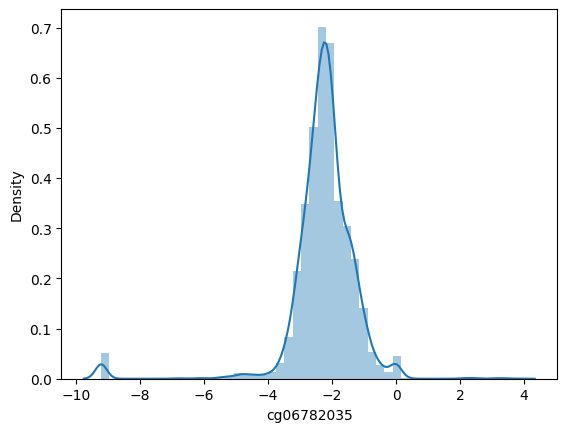

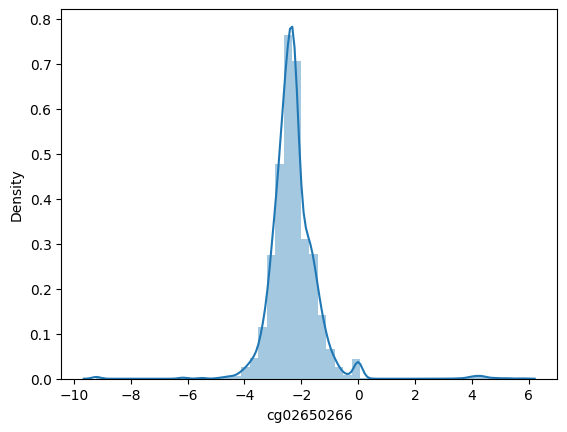

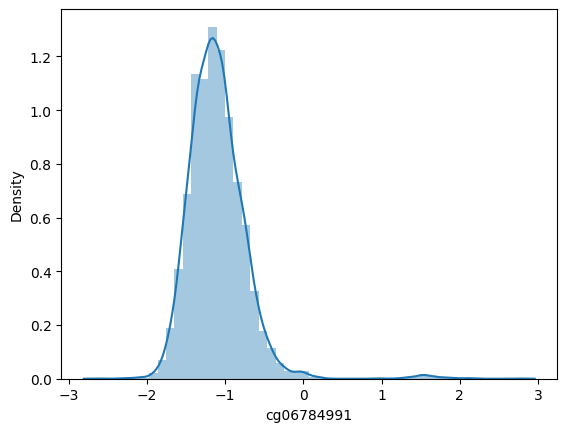

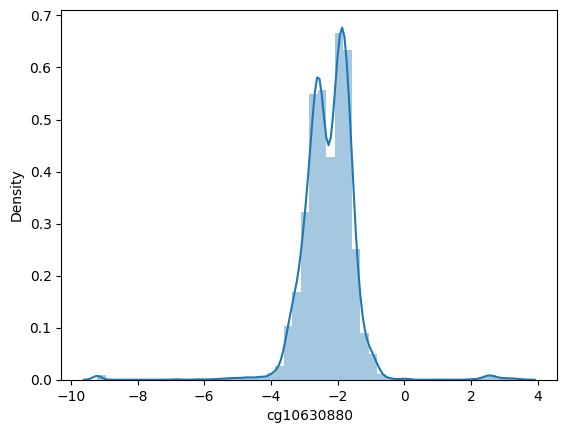

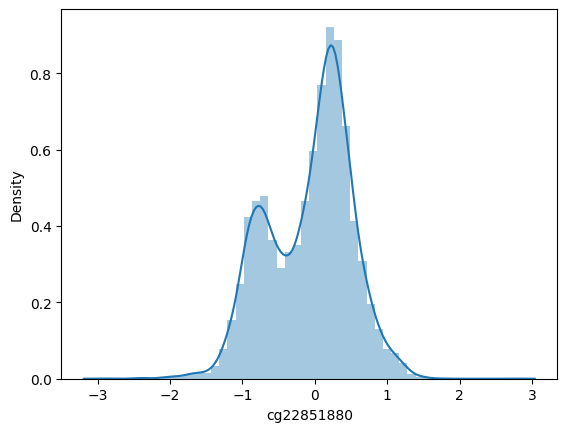

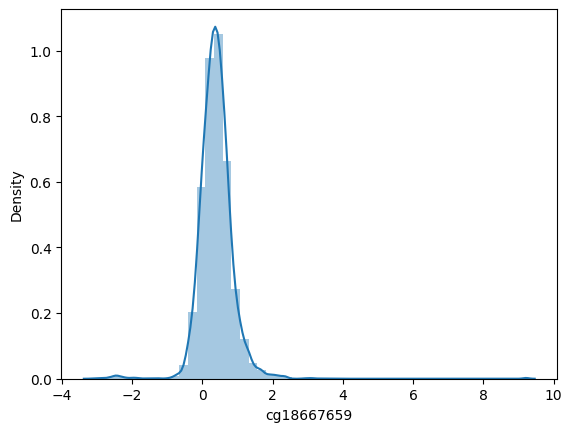

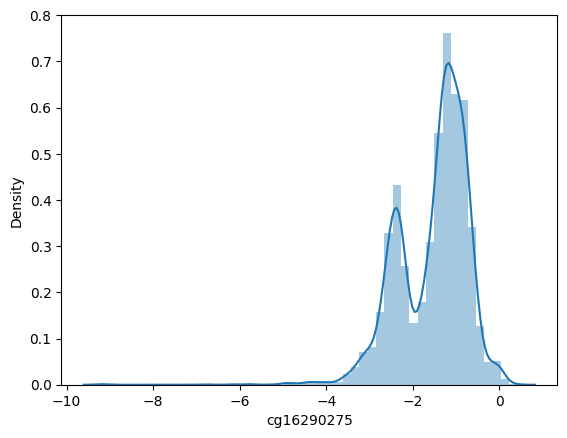

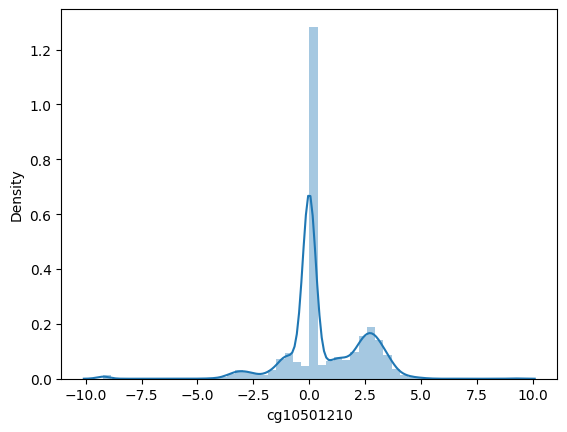

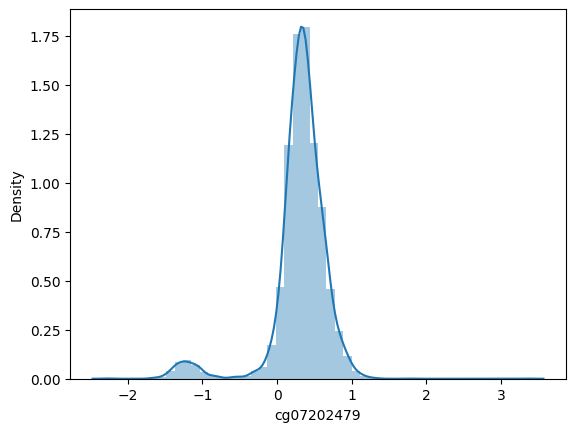

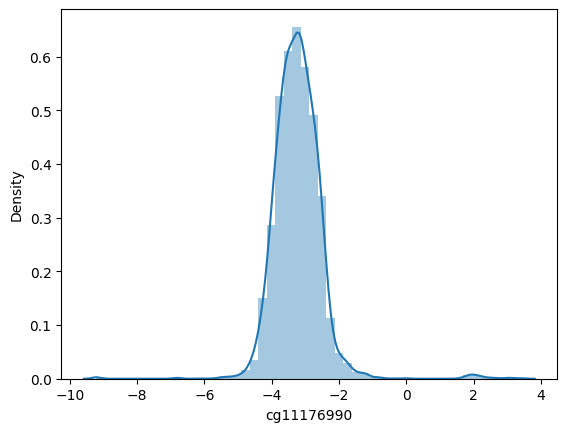

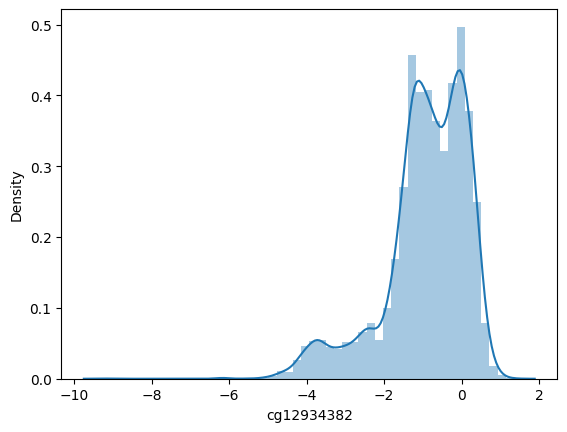

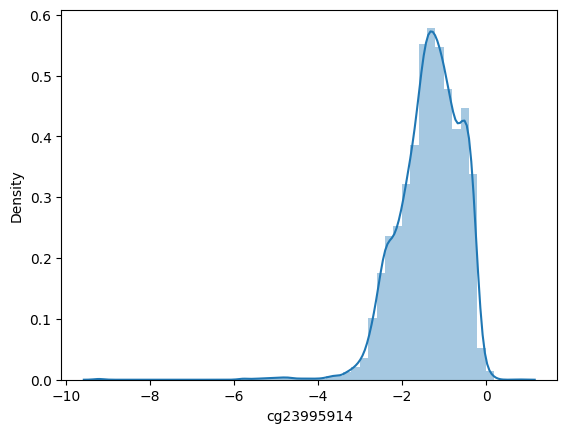

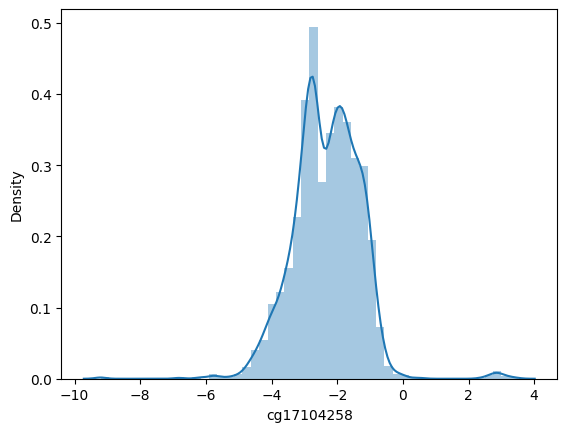

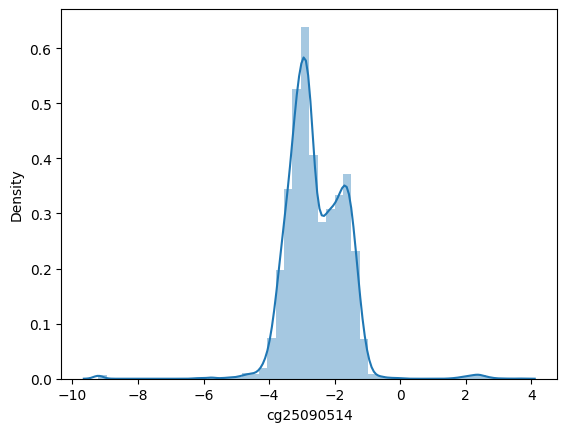

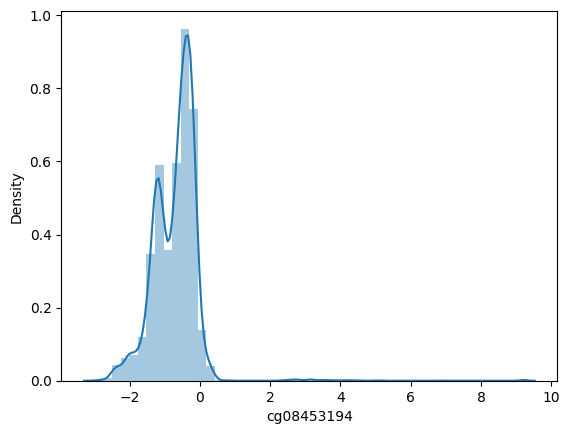

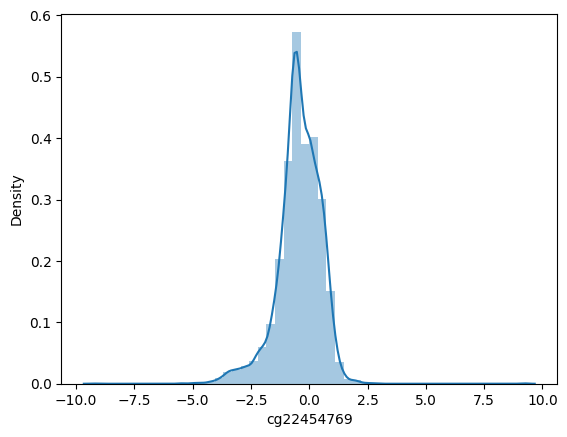

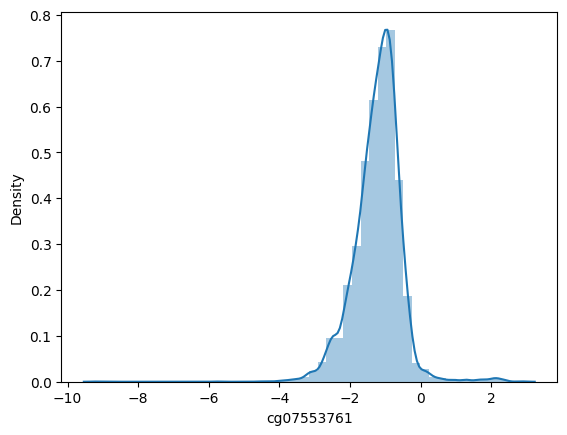

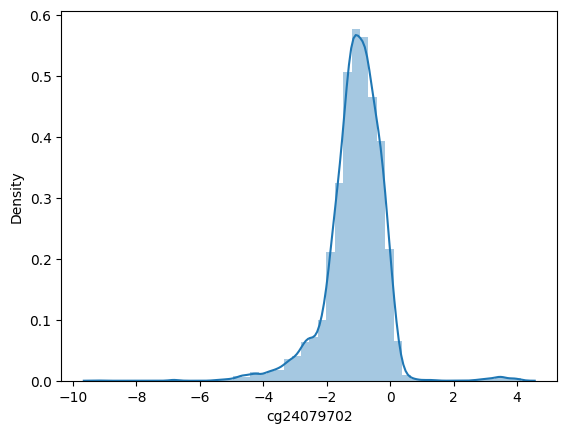

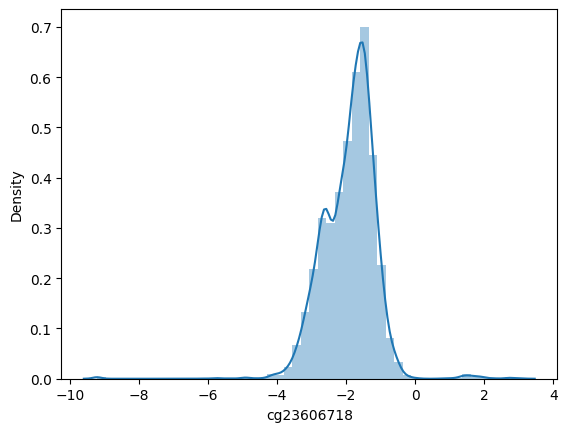

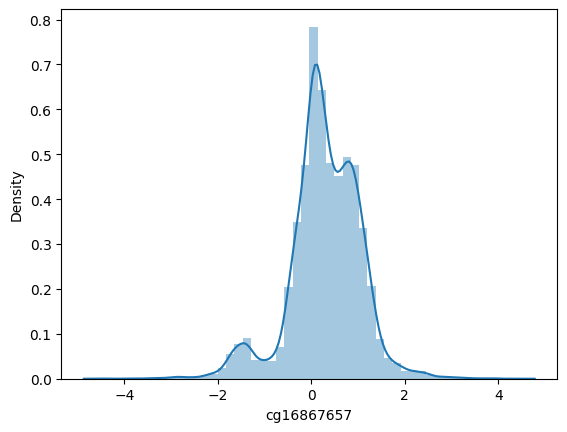

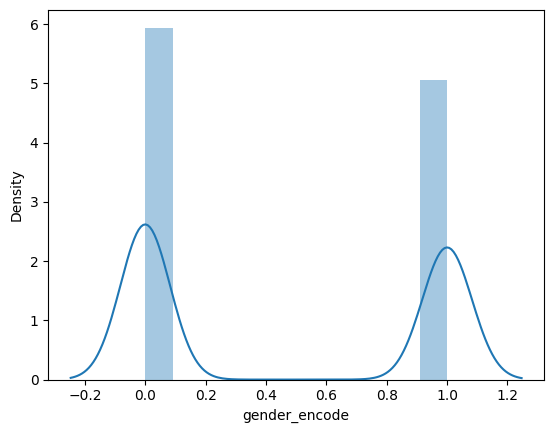

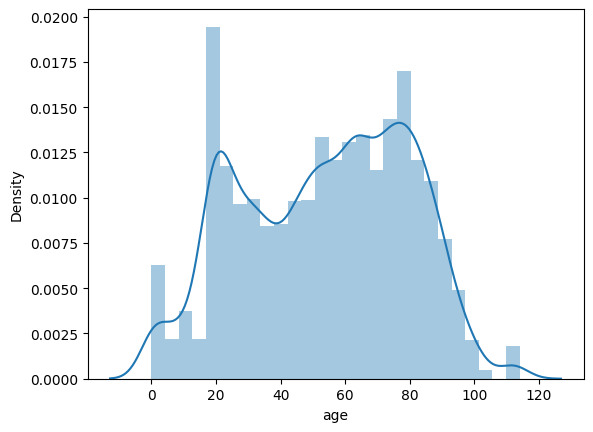

In [6]:
#绘制数据分布图
import matplotlib.pyplot as plt
import seaborn as sns
for age_label in Age_feature:
    fig=plt.figure()
    ax=fig.add_subplot()
    sns.distplot(Age_feature_data.loc[:,age_label],hist=True,kde=True,rug=False)
    plt.show()

In [7]:
#计算斯皮尔曼相关性
from pandas import DataFrame
from scipy.stats import spearmanr
age_spear_list,age_pvalues_spear_list=[],[]
for age_label in Age_feature[:20]:
    stats_spear,pvalues_spear=spearmanr(Age_feature_data.loc[:,age_label],Age_feature_data['age'])
    age_spear_list.append(stats_spear)
    age_pvalues_spear_list.append(pvalues_spear)
Corr_spear=DataFrame(Age_feature[:20])
Corr_spear['Spearman']=age_spear_list
Corr_spear['P_values']=age_pvalues_spear_list
Corr_spear.columns=['cg','Spearman','P_values']
Corr_spear.sort_values('Spearman',ascending=False)

cg  Spearman       P_values
11  cg23995914  0.724931   0.000000e+00
9   cg11176990  0.697864   0.000000e+00
13  cg25090514  0.654536   0.000000e+00
16  cg07553761  0.630504   0.000000e+00
5   cg18667659  0.566513   0.000000e+00
17  cg24079702  0.546958   0.000000e+00
18  cg23606718  0.541610   0.000000e+00
1   cg02650266  0.517605   0.000000e+00
19  cg16867657  0.504503   0.000000e+00
15  cg22454769  0.473058   0.000000e+00
0   cg06782035  0.409698   0.000000e+00
2   cg06784991  0.363914  2.940928e-256
10  cg12934382  0.310387  2.458023e-183
12  cg17104258 -0.131589   3.999642e-33
4   cg22851880 -0.205071   6.913939e-79
3   cg10630880 -0.477016   0.000000e+00
8   cg07202479 -0.536098   0.000000e+00
6   cg16290275 -0.556945   0.000000e+00
14  cg08453194 -0.602760   0.000000e+00
7   cg10501210 -0.645215   0.000000e+00

<Figure size 1920x1440 with 0 Axes>

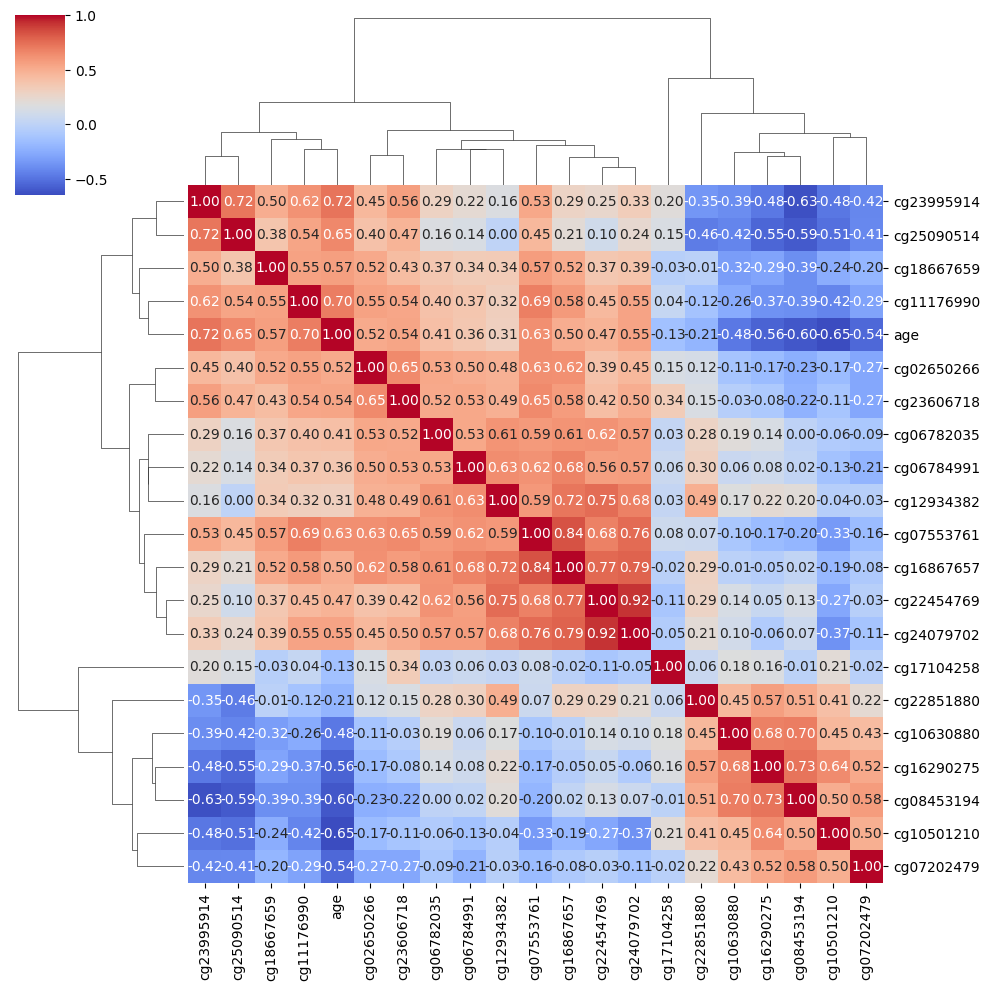

In [8]:
#使用DataFrame中corr（）方法绘制热力图
Hearmap_Data=Age_feature_data.loc[:,['cg06782035','cg02650266','cg06784991','cg10630880','cg22851880','cg18667659','cg16290275',
             'cg10501210','cg07202479','cg11176990','cg12934382','cg23995914','cg17104258','cg25090514',
             'cg08453194','cg22454769','cg07553761','cg24079702','cg23606718','cg16867657','age']]
Spearman_corr=Hearmap_Data.corr(method='spearman')
corrheatmap=plt.figure(dpi=300)
sns.clustermap(Spearman_corr,annot=True,cmap='coolwarm', fmt=".2f")  
plt.show()

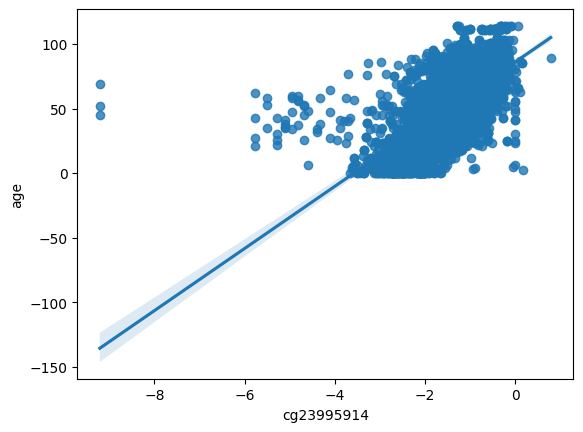

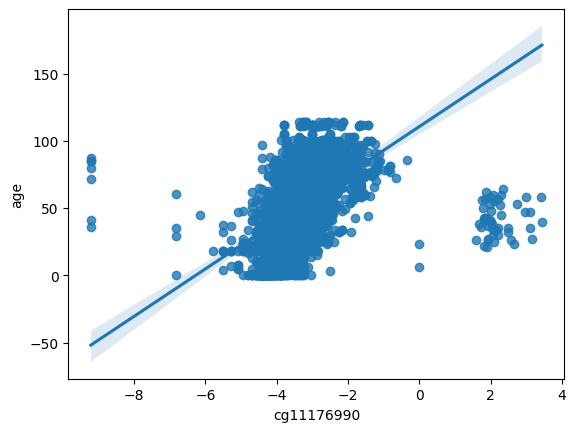

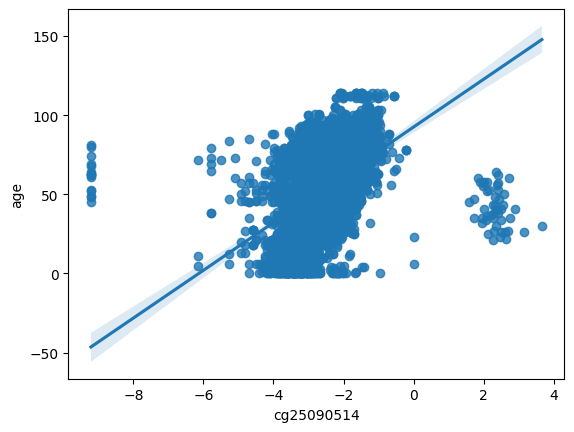

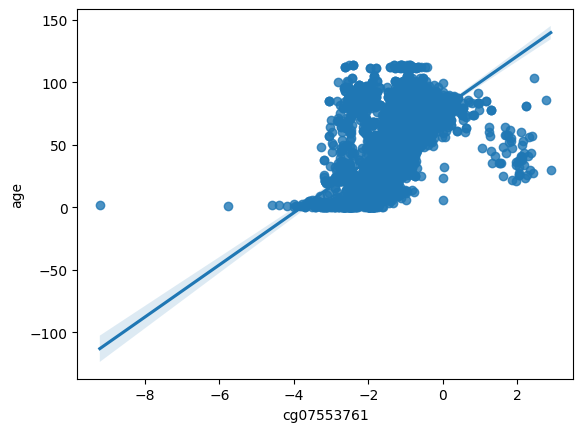

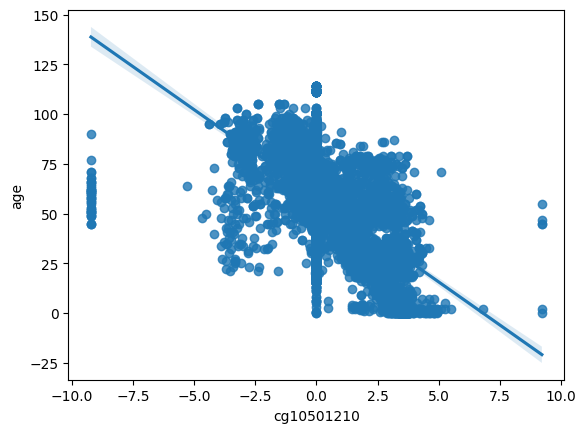

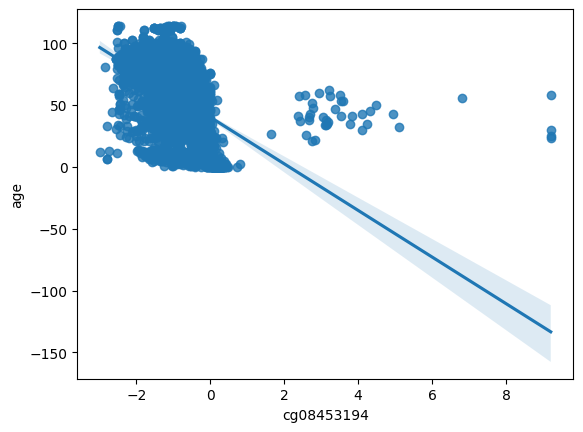

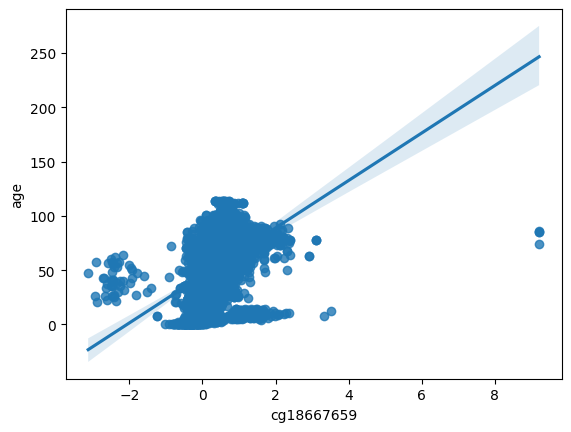

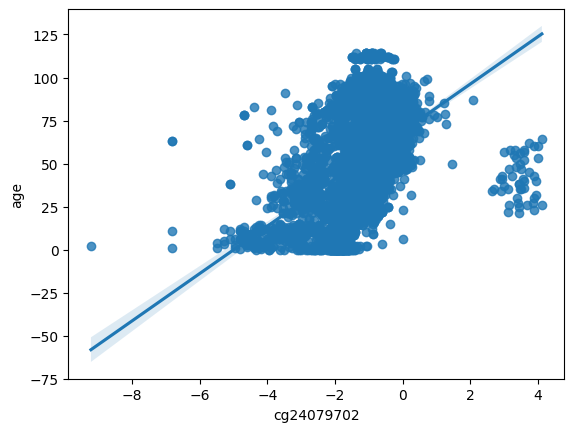

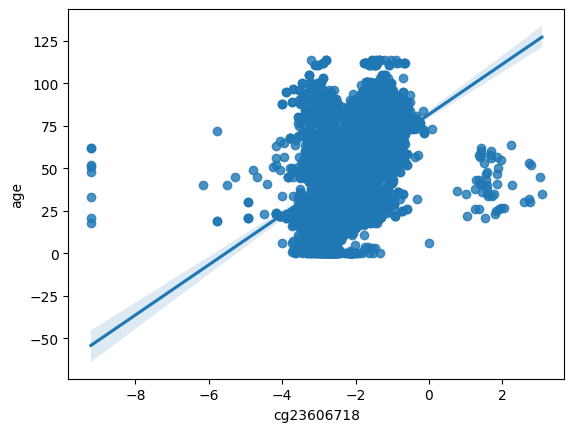

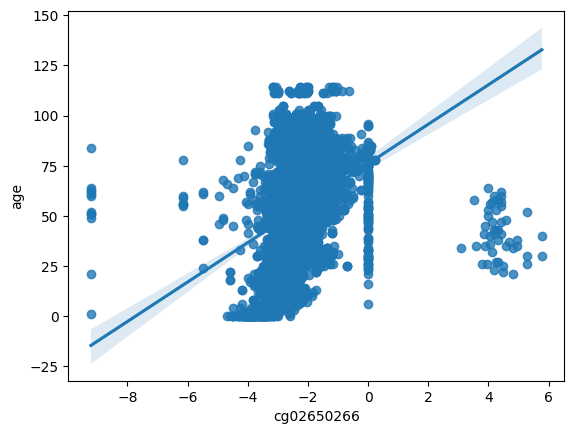

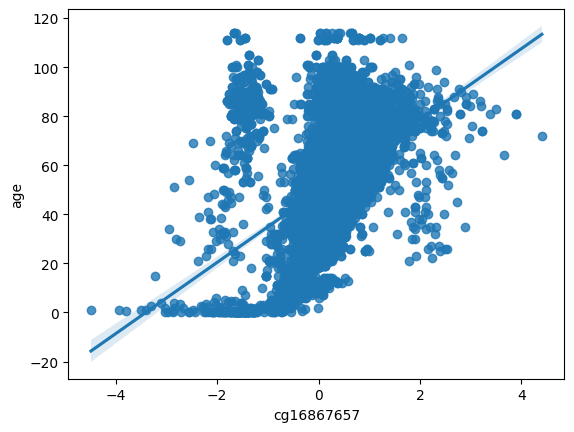

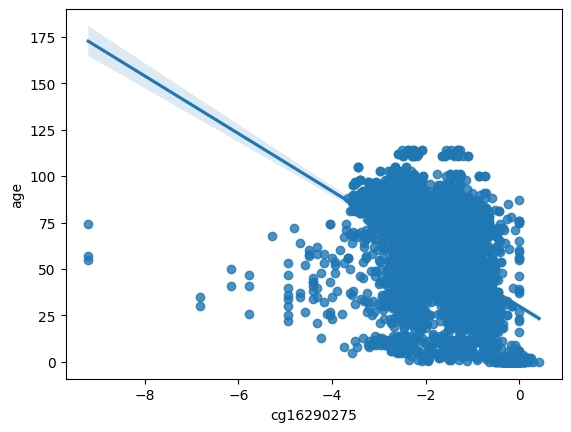

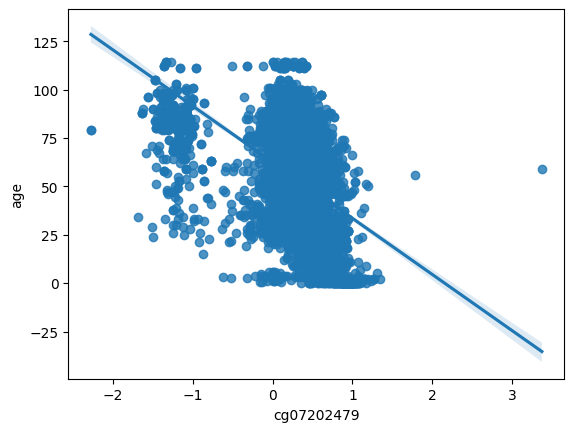

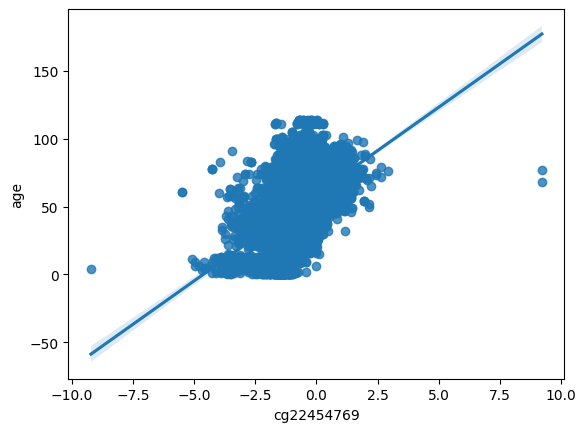

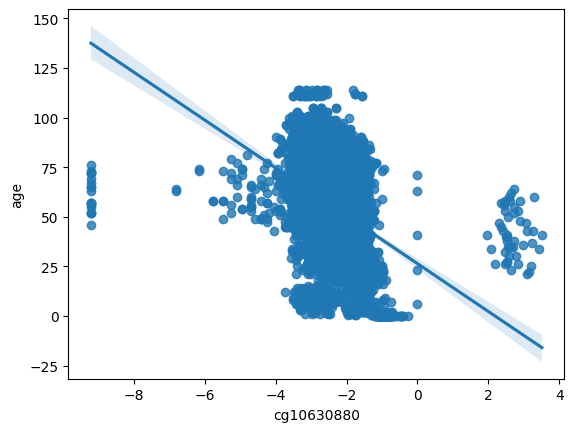

In [9]:
#绘制特征散点图
age_features=['cg23995914','cg11176990','cg25090514','cg07553761','cg10501210','cg08453194',
             'cg18667659','cg24079702','cg23606718','cg02650266','cg16867657','cg16290275',
            'cg07202479','cg22454769','cg10630880']
for age_label in age_features:
    fig=plt.figure()
    scatter=fig.add_subplot()
    sns.regplot(x=age_label,y='age',data=Age_feature_data)
    plt.show()

In [10]:
#查看生物学年龄预测特征数据统计学特征
Age_stats_data=Age_feature_data.loc[:,age_features]
Age_stats_data.describe()

cg23995914   cg11176990   cg25090514   cg07553761   cg10501210  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean     -1.343022    -3.228384    -2.576982    -1.218787     0.615572   
std       0.733910     0.747963     0.896694     0.664375     1.757332   
min      -9.210440    -9.210440    -9.210440    -9.210440    -9.210440   
25%      -1.773795    -3.659672    -3.149987    -1.564056     0.000000   
50%      -1.282902    -3.256540    -2.732410    -1.152395     0.000000   
75%      -0.809306    -2.842141    -1.936120    -0.832866     2.079779   
max       0.790611     3.439160     3.659672     2.901295     9.210440   

        cg08453194   cg18667659   cg24079702   cg23606718   cg02650266  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean     -0.711307     0.387922    -1.090929    -1.908759    -2.276112   
std       0.642854     0.503417     0.902035     0.772630     0.889181   
min      -2.985388    -3.124904    -9.210440    -9.210440    -9.210440   
25%      -1.130596     0.124134    -1.475799    -2.401172    -2.681278   
50%      -0.588284     0.368026    -1.014773    -1.798190    -2.337277   
75%      -0.322708     0.623305    -0.557927    -1.430239    -1.945225   
max       9.210440     9.210440     4.112908     3.076403     5.773449   

        cg16867657   cg16290275   cg07202479   cg22454769   cg10630880  
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000  
mean      0.288584    -1.531984     0.304449    -0.437145    -2.262576  
std       0.762887     0.794849     0.392210     0.936942     0.809762  
min      -4.489850    -9.210440    -2.276579    -9.210440    -9.210440  
25%      -0.072017    -2.207487     0.200630    -0.880658    -2.681278  
50%       0.273640    -1.312567     0.343263    -0.413720    -2.218738  
75%       0.799942    -0.959169     0.497942     0.196592    -1.806416  
max       4.402578     0.422073     3.374769     9.210440     3.507691

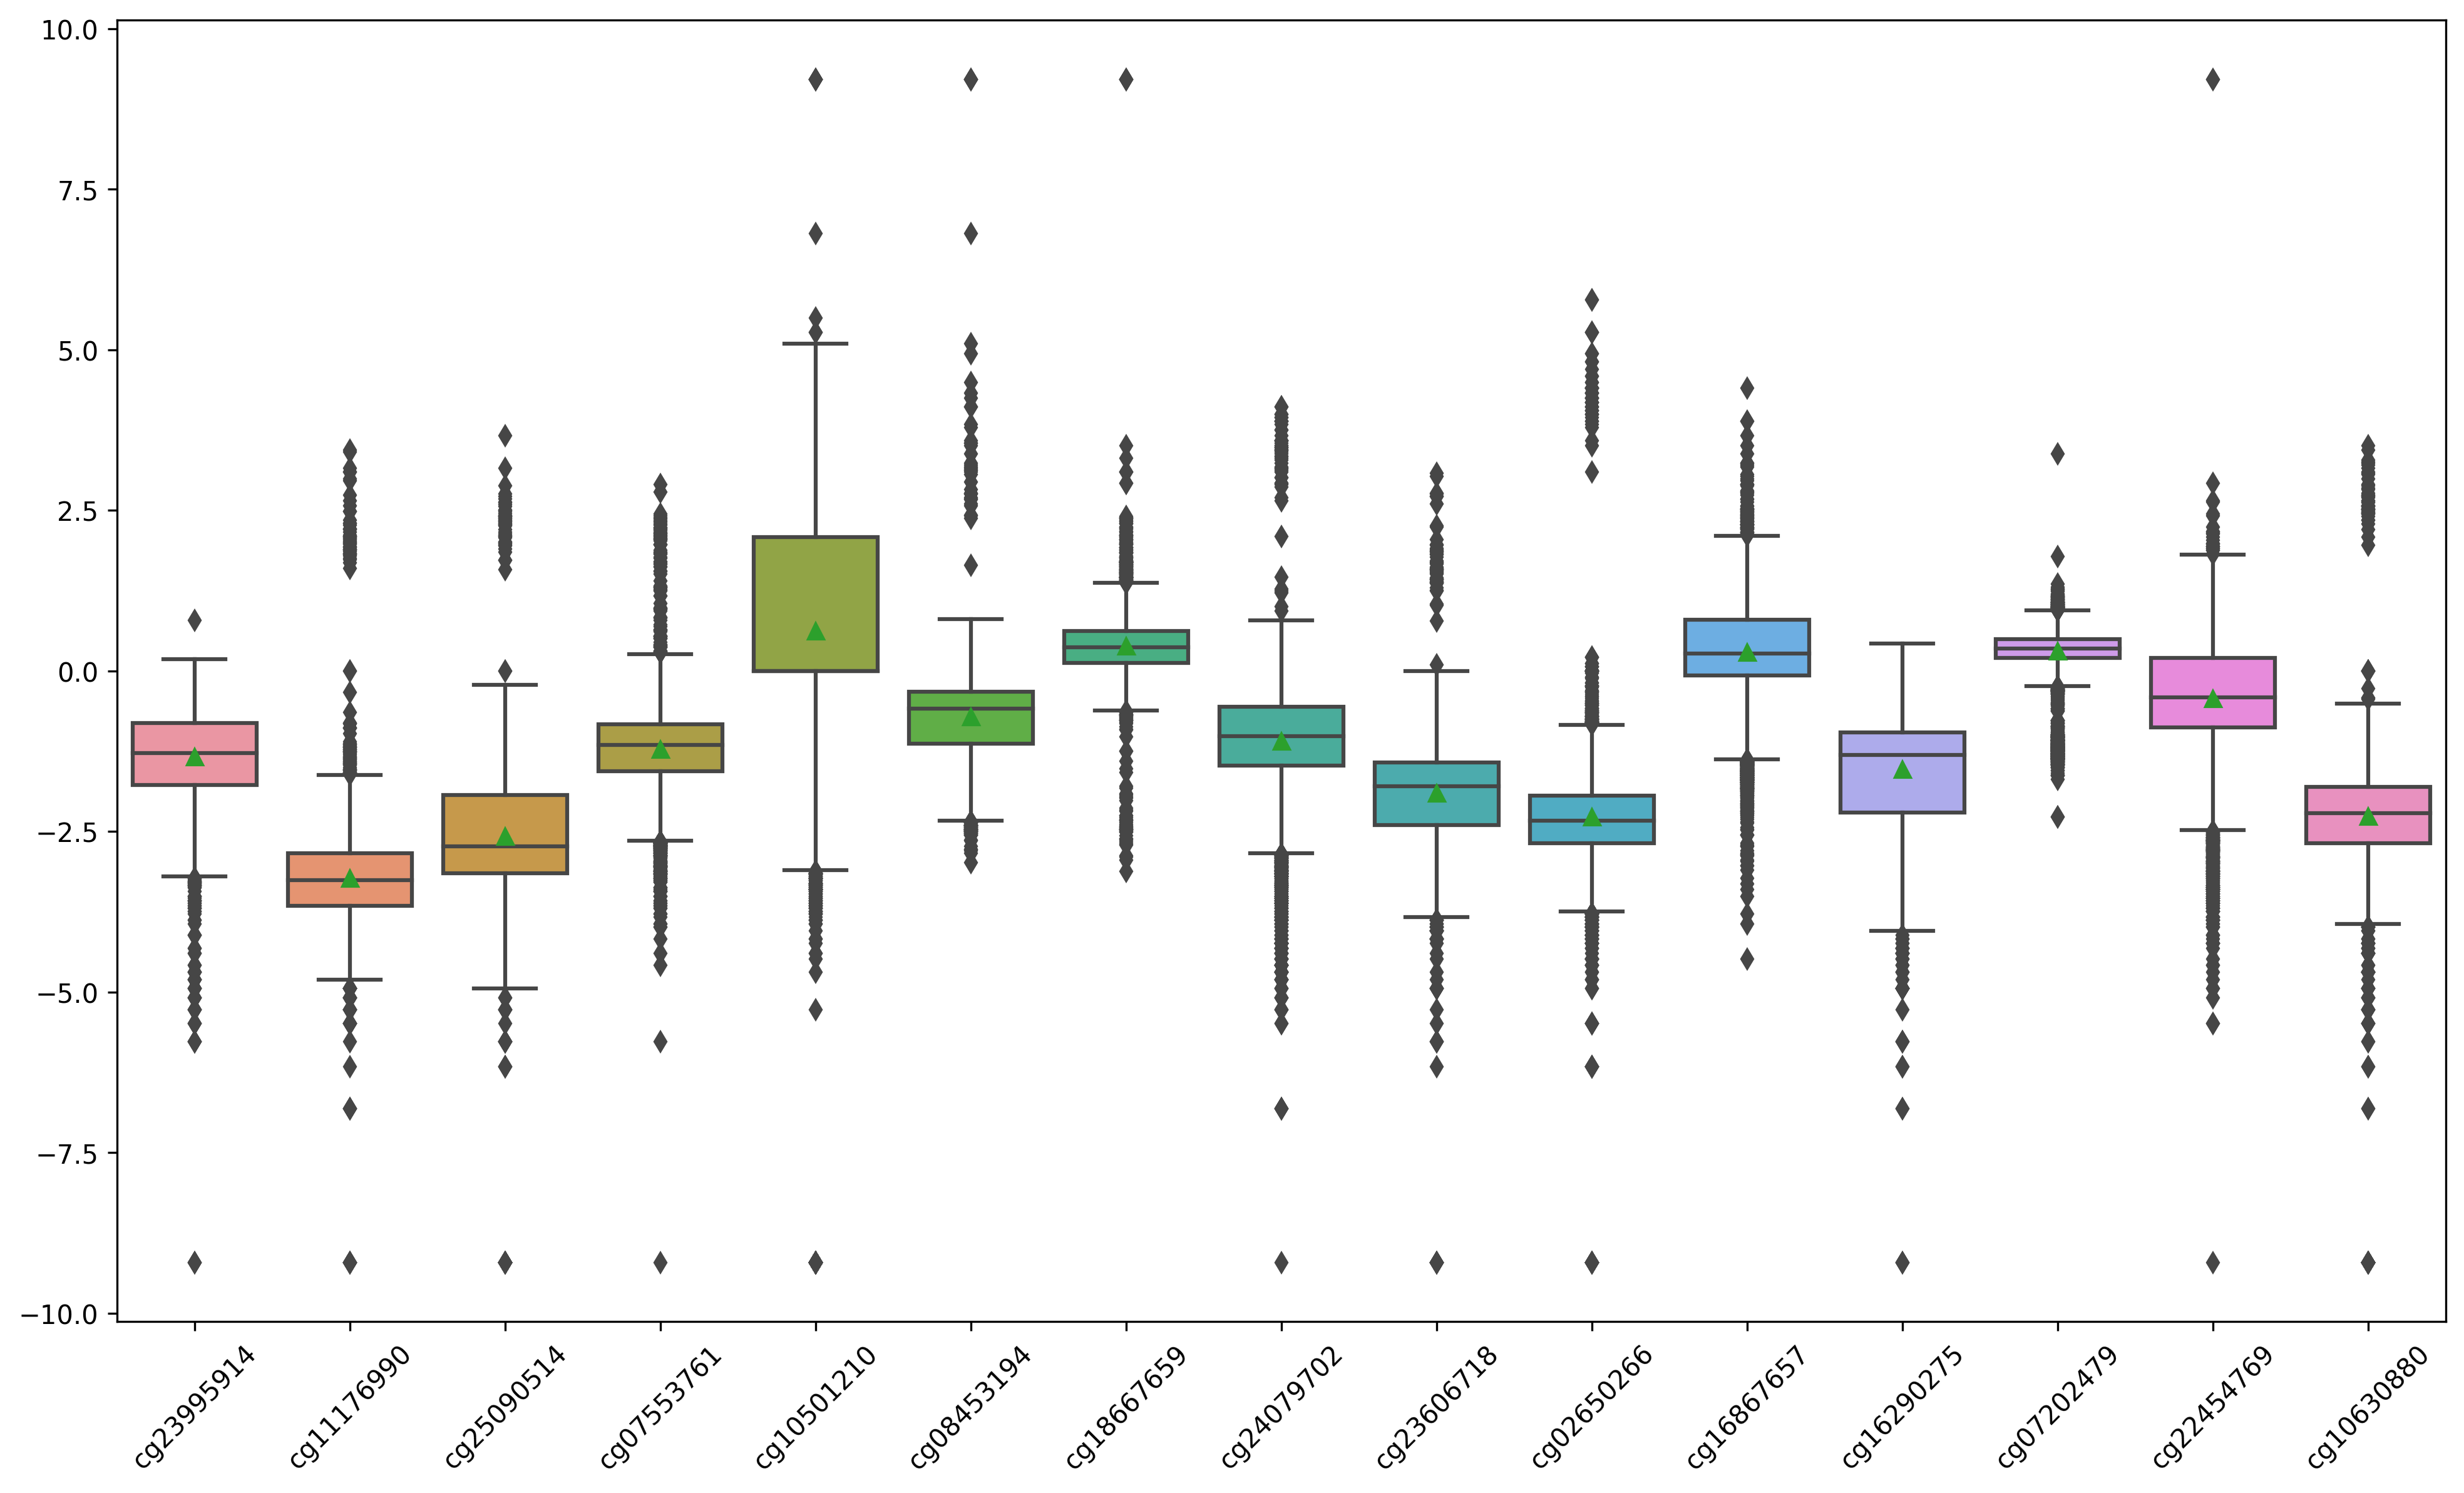

In [11]:
#绘制箱型图
boxplot=plt.figure(figsize=(16,9),dpi=300)
sns.boxplot(Age_stats_data,showmeans=True)
plt.xticks(rotation=45)
plt.show()

统计学分析，探究不同疾病间生物学年龄差异

In [12]:
#探究健康样本与患病样本间生物学年龄差异
Normal_Data=feature_data.loc[feature_data['disease_encode']==0,'age']    #构造数据
Alzheimer=feature_data.loc[feature_data['disease_encode']==1,'age']    
schizophrenia=feature_data.loc[feature_data['disease_encode']==2,'age']
Parkinson=feature_data.loc[feature_data['disease_encode']==3,'age']
rheumatoid=feature_data.loc[feature_data['disease_encode']==4,'age']
stroke=feature_data.loc[feature_data['disease_encode']==5,'age']
Huntington=feature_data.loc[feature_data['disease_encode']==6,'age']
Graves=feature_data.loc[feature_data['disease_encode']==7,'age']
type_2_diabetes=feature_data.loc[feature_data['disease_encode']==8,'age']
Sjogren=feature_data.loc[feature_data['disease_encode']==9,'age']
from scipy.stats import kruskal    #统计检验
Groups=[Normal_Data,Alzheimer,schizophrenia,Parkinson,rheumatoid,stroke,Huntington,Graves,type_2_diabetes,Sjogren]
statistic,p_value=kruskal(*Groups)
print('Kruskal-Wallis H检验统计量为:{:.6f},P值为:{:.6f}'.format(statistic,p_value))

Kruskal-Wallis H检验统计量为:1751.851222,P值为:0.000000


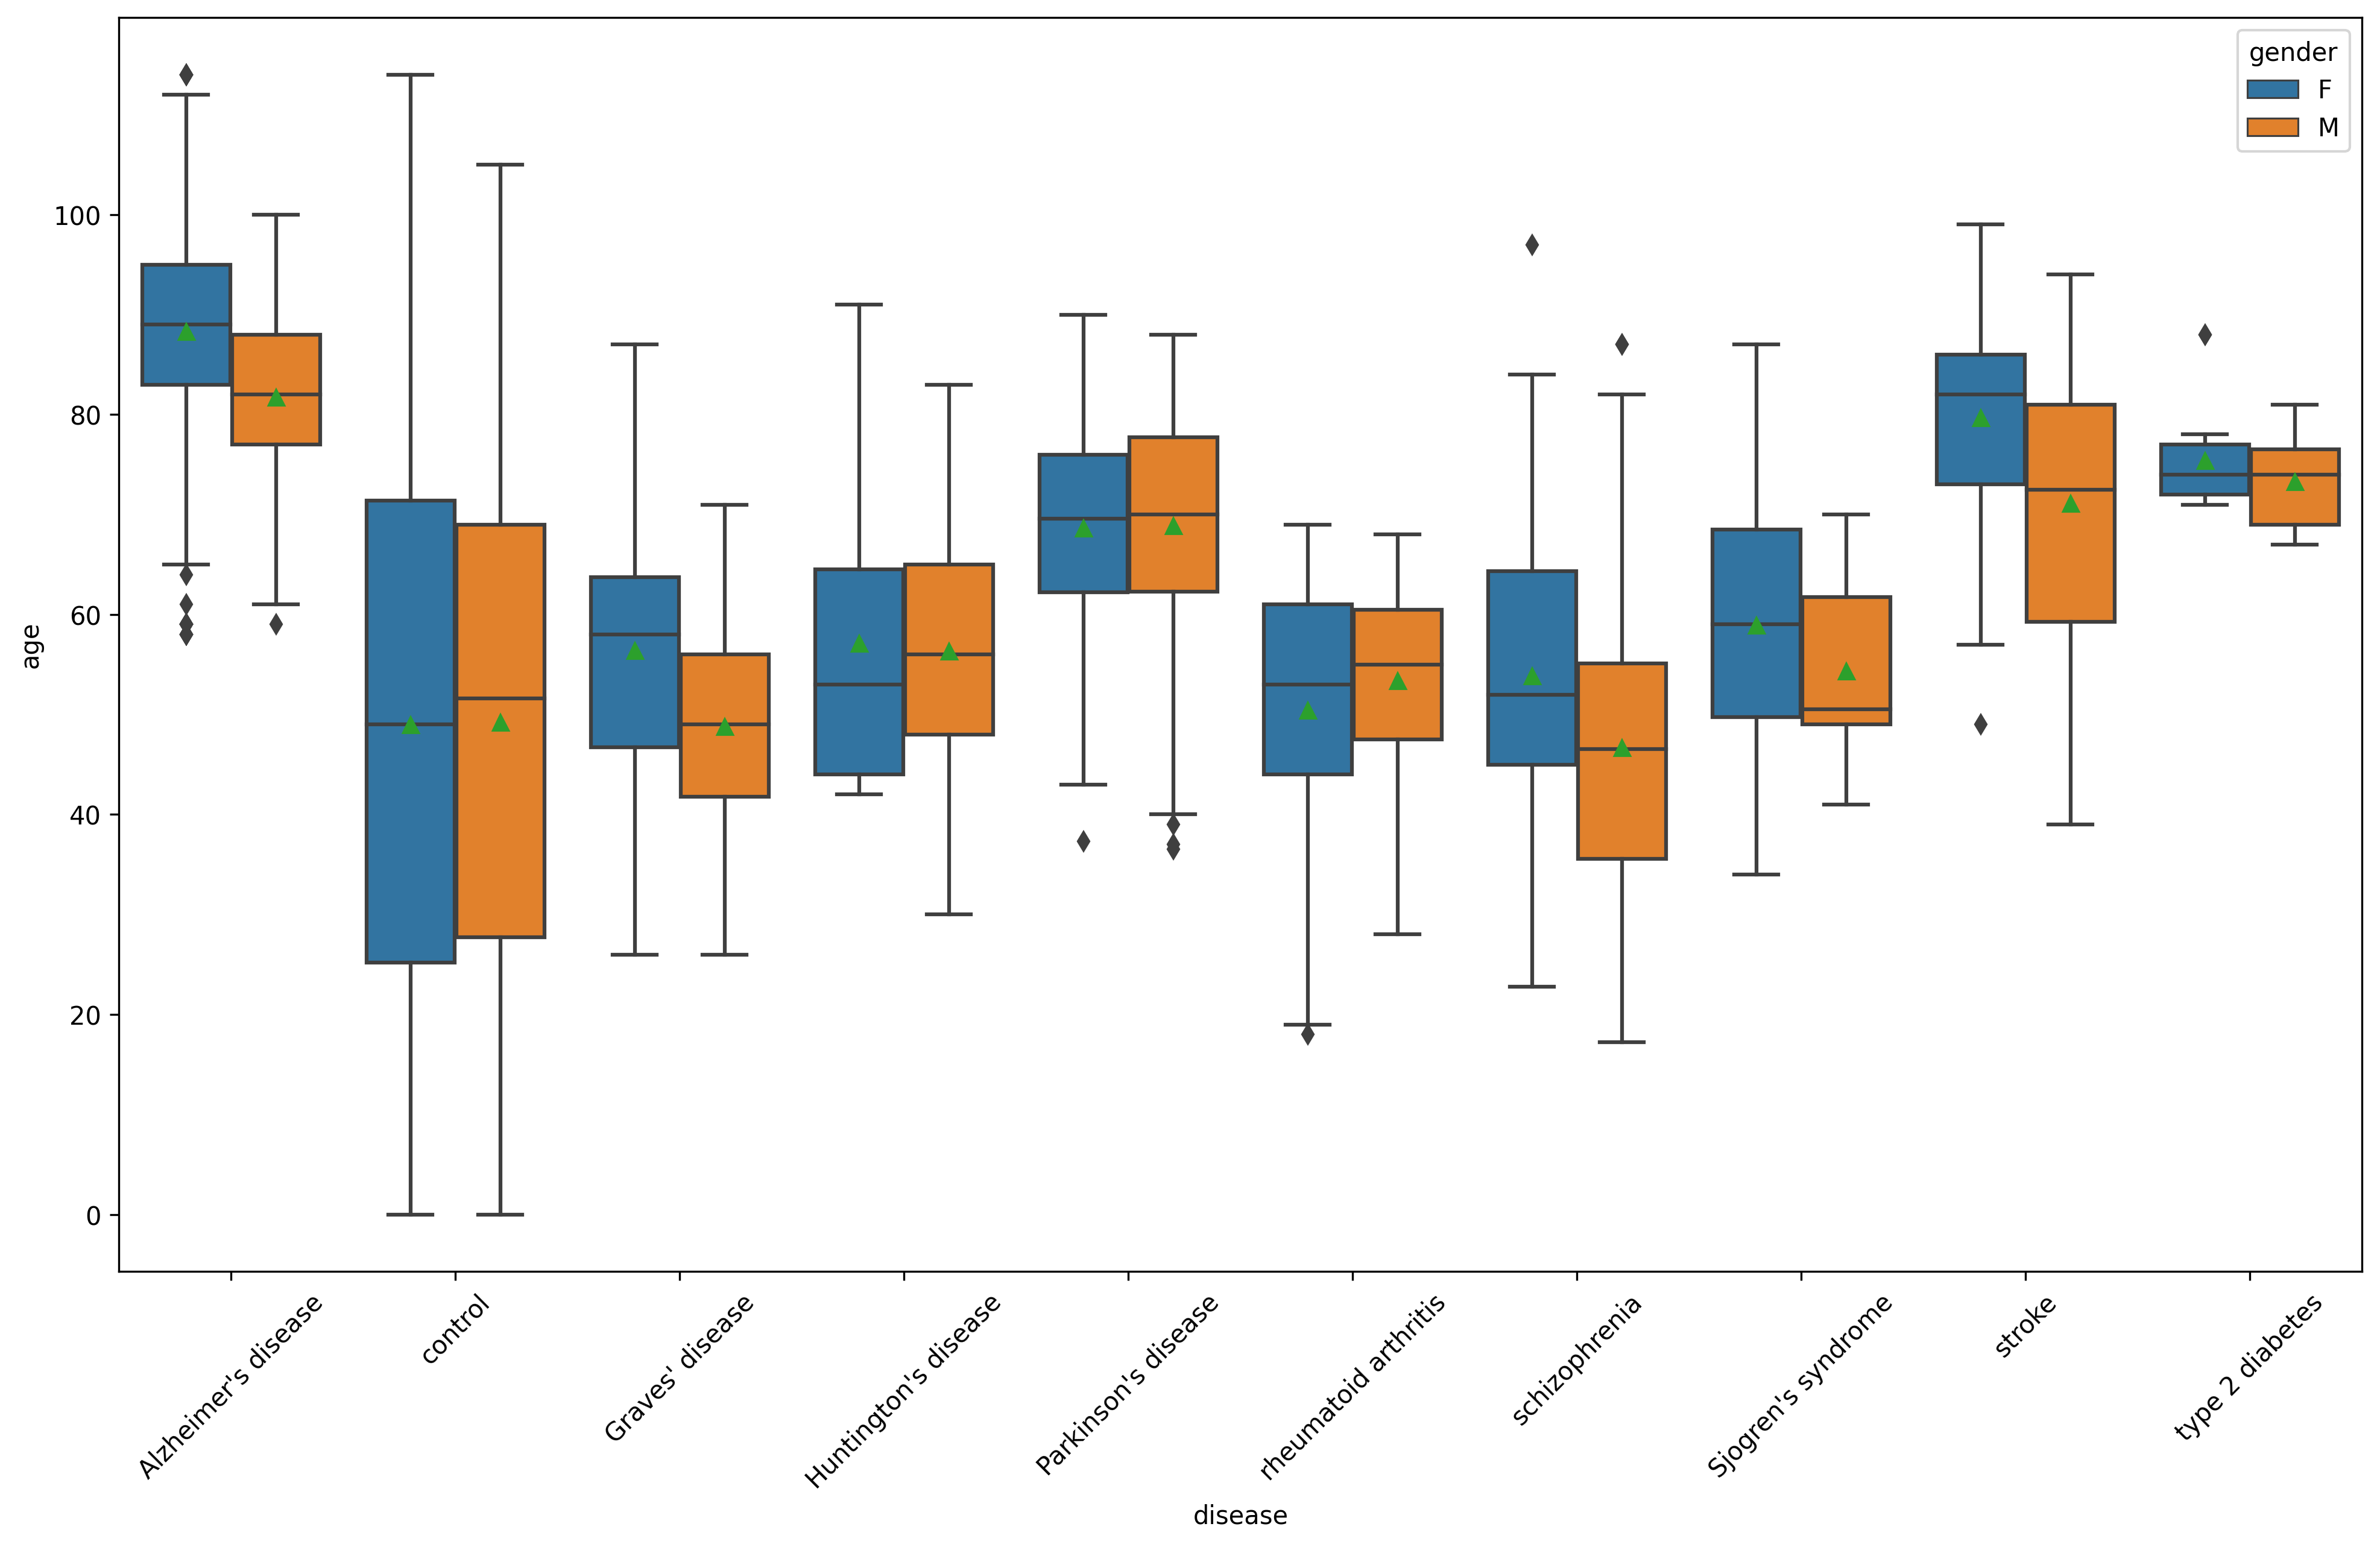

In [13]:
#绘制箱型图查看年龄差异
Age_Box=plt.figure(figsize=(16,9),dpi=300)
sns.boxplot(feature_data,x='disease',y='age',hue='gender',showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install joypy

<Figure size 4800x2700 with 0 Axes>

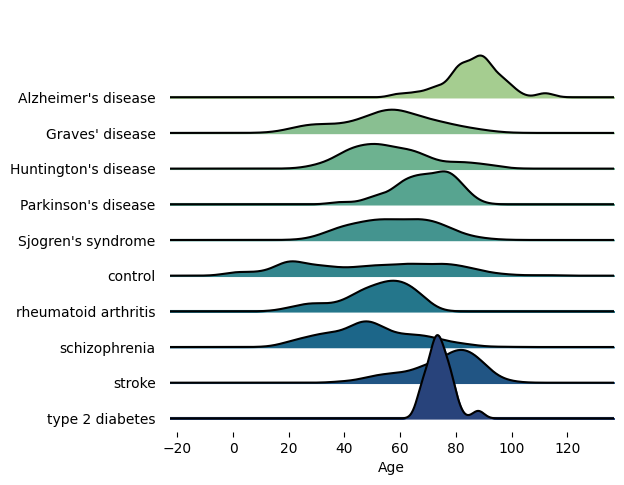

In [16]:
#绘制山脊图
from joypy import joyplot
Age_hue=plt.figure(figsize=(16,9),dpi=300)
joyplot(feature_data,by='disease',column='age',colormap=sns.color_palette('crest',as_cmap=True))
plt.xlabel('Age')
plt.show()

In [17]:
#合并数据
Disease_data=pd.concat([Alzheimer,schizophrenia,Parkinson,rheumatoid,stroke,Huntington,Graves,type_2_diabetes,Sjogren],axis=0)
Disease_data.shape

(1967,)

In [18]:
#采用Mann-Whitney U检验和科尔莫戈罗夫-斯米尔诺夫检验探究不同数据间差异
from scipy.stats import mannwhitneyu
Mann_whitneyu_stats,Mann_whitneyu_Pvalue=mannwhitneyu(Normal_Data,Disease_data)
print('Mann_WhitneyU检验统计量为:{:.6f},P值为:{:.6f}'.format(Mann_whitneyu_stats,Mann_whitneyu_Pvalue))
from scipy.stats import ks_2samp
ks_stats,ks_Pvalue=ks_2samp(Normal_Data,Disease_data)
print('Kolmogorov-Smirnov检验统计量为:{:.6f},P值为:{:.6f}'.format(ks_stats,ks_Pvalue))

Mann_WhitneyU检验统计量为:3327968.500000,P值为:0.000000
Kolmogorov-Smirnov检验统计量为:0.325113,P值为:0.000000


In [19]:
#绘制箱型图和密度估计图
Disease_data=DataFrame(Disease_data)
Disease_data['disease_type']='Disease'
Normal_Data=DataFrame(Normal_Data)
Normal_Data['disease_type']='Normal'
Normal_Disaese=pd.concat([Normal_Data,Disease_data],axis=0)
Normal_Disaese.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8233 entries, 737 to 8232
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           8233 non-null   float64
 1   disease_type  8233 non-null   object 
dtypes: float64(1), object(1)
memory usage: 193.0+ KB


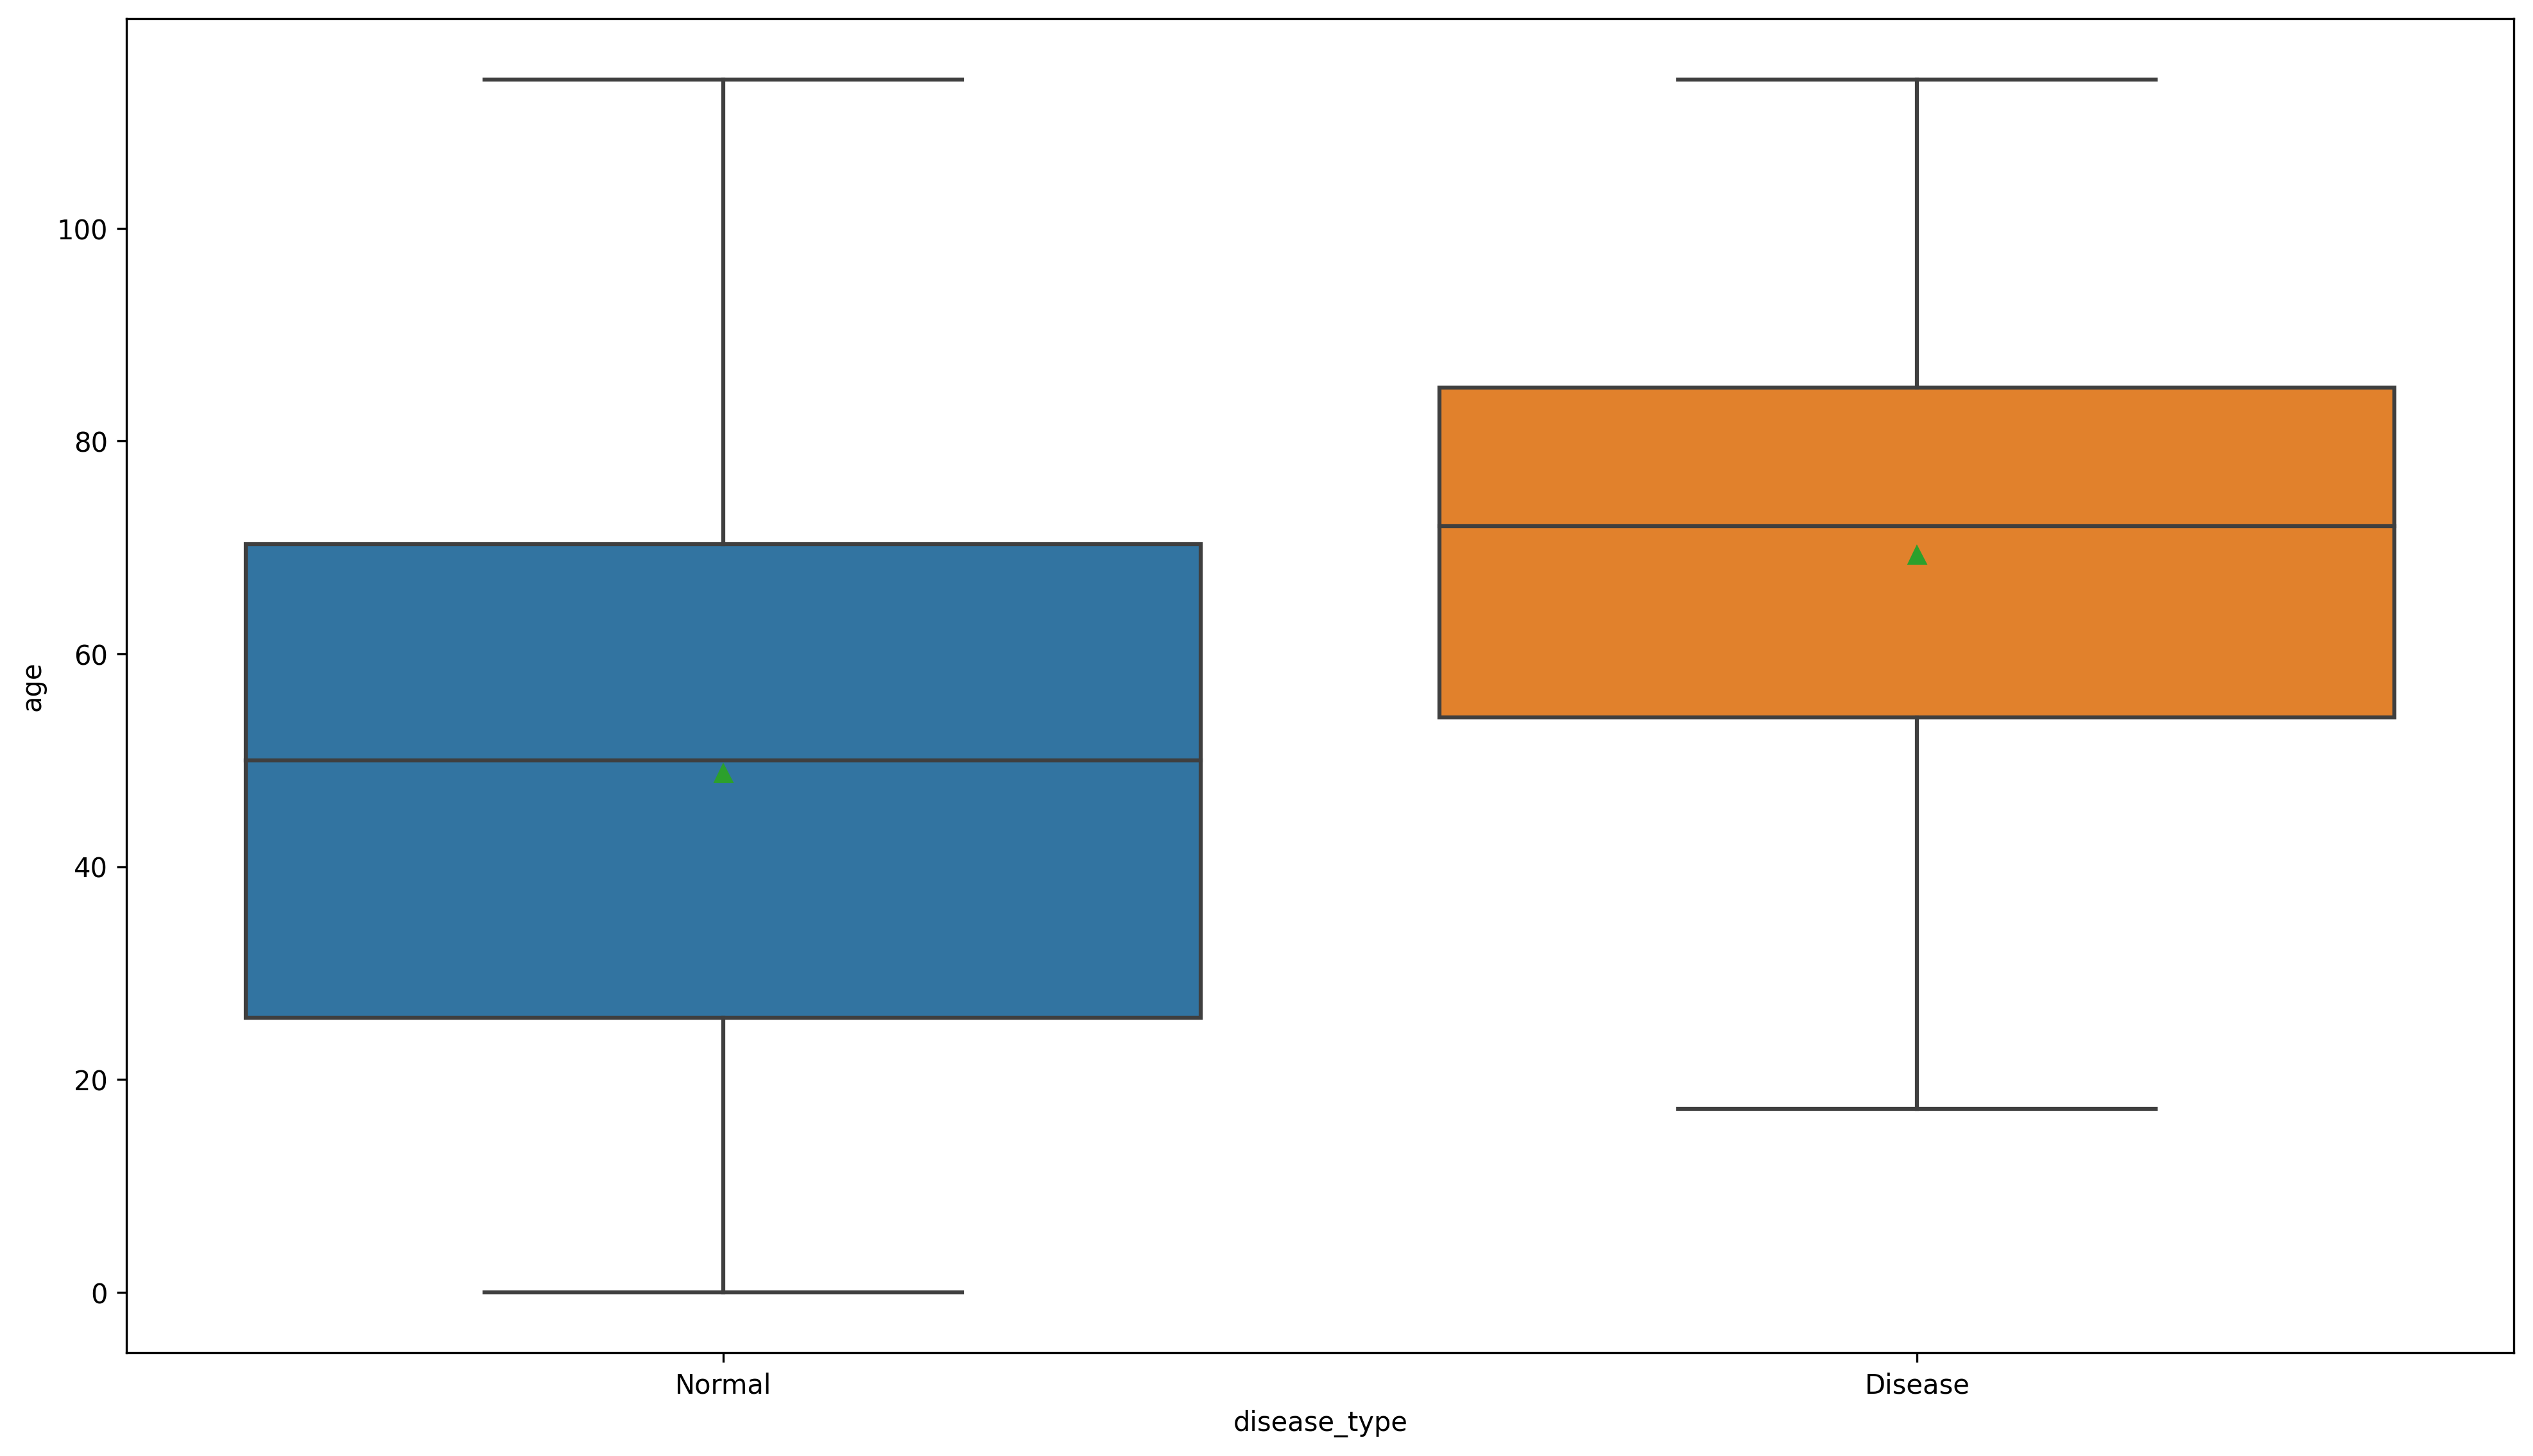

In [20]:
#绘制箱型图
ND_boxplot=plt.figure(figsize=(16,9),dpi=300)
sns.boxplot(Normal_Disaese.iloc[:-1,:],x='disease_type',y='age',showmeans=True)
plt.xticks(rotation=0)
plt.show()

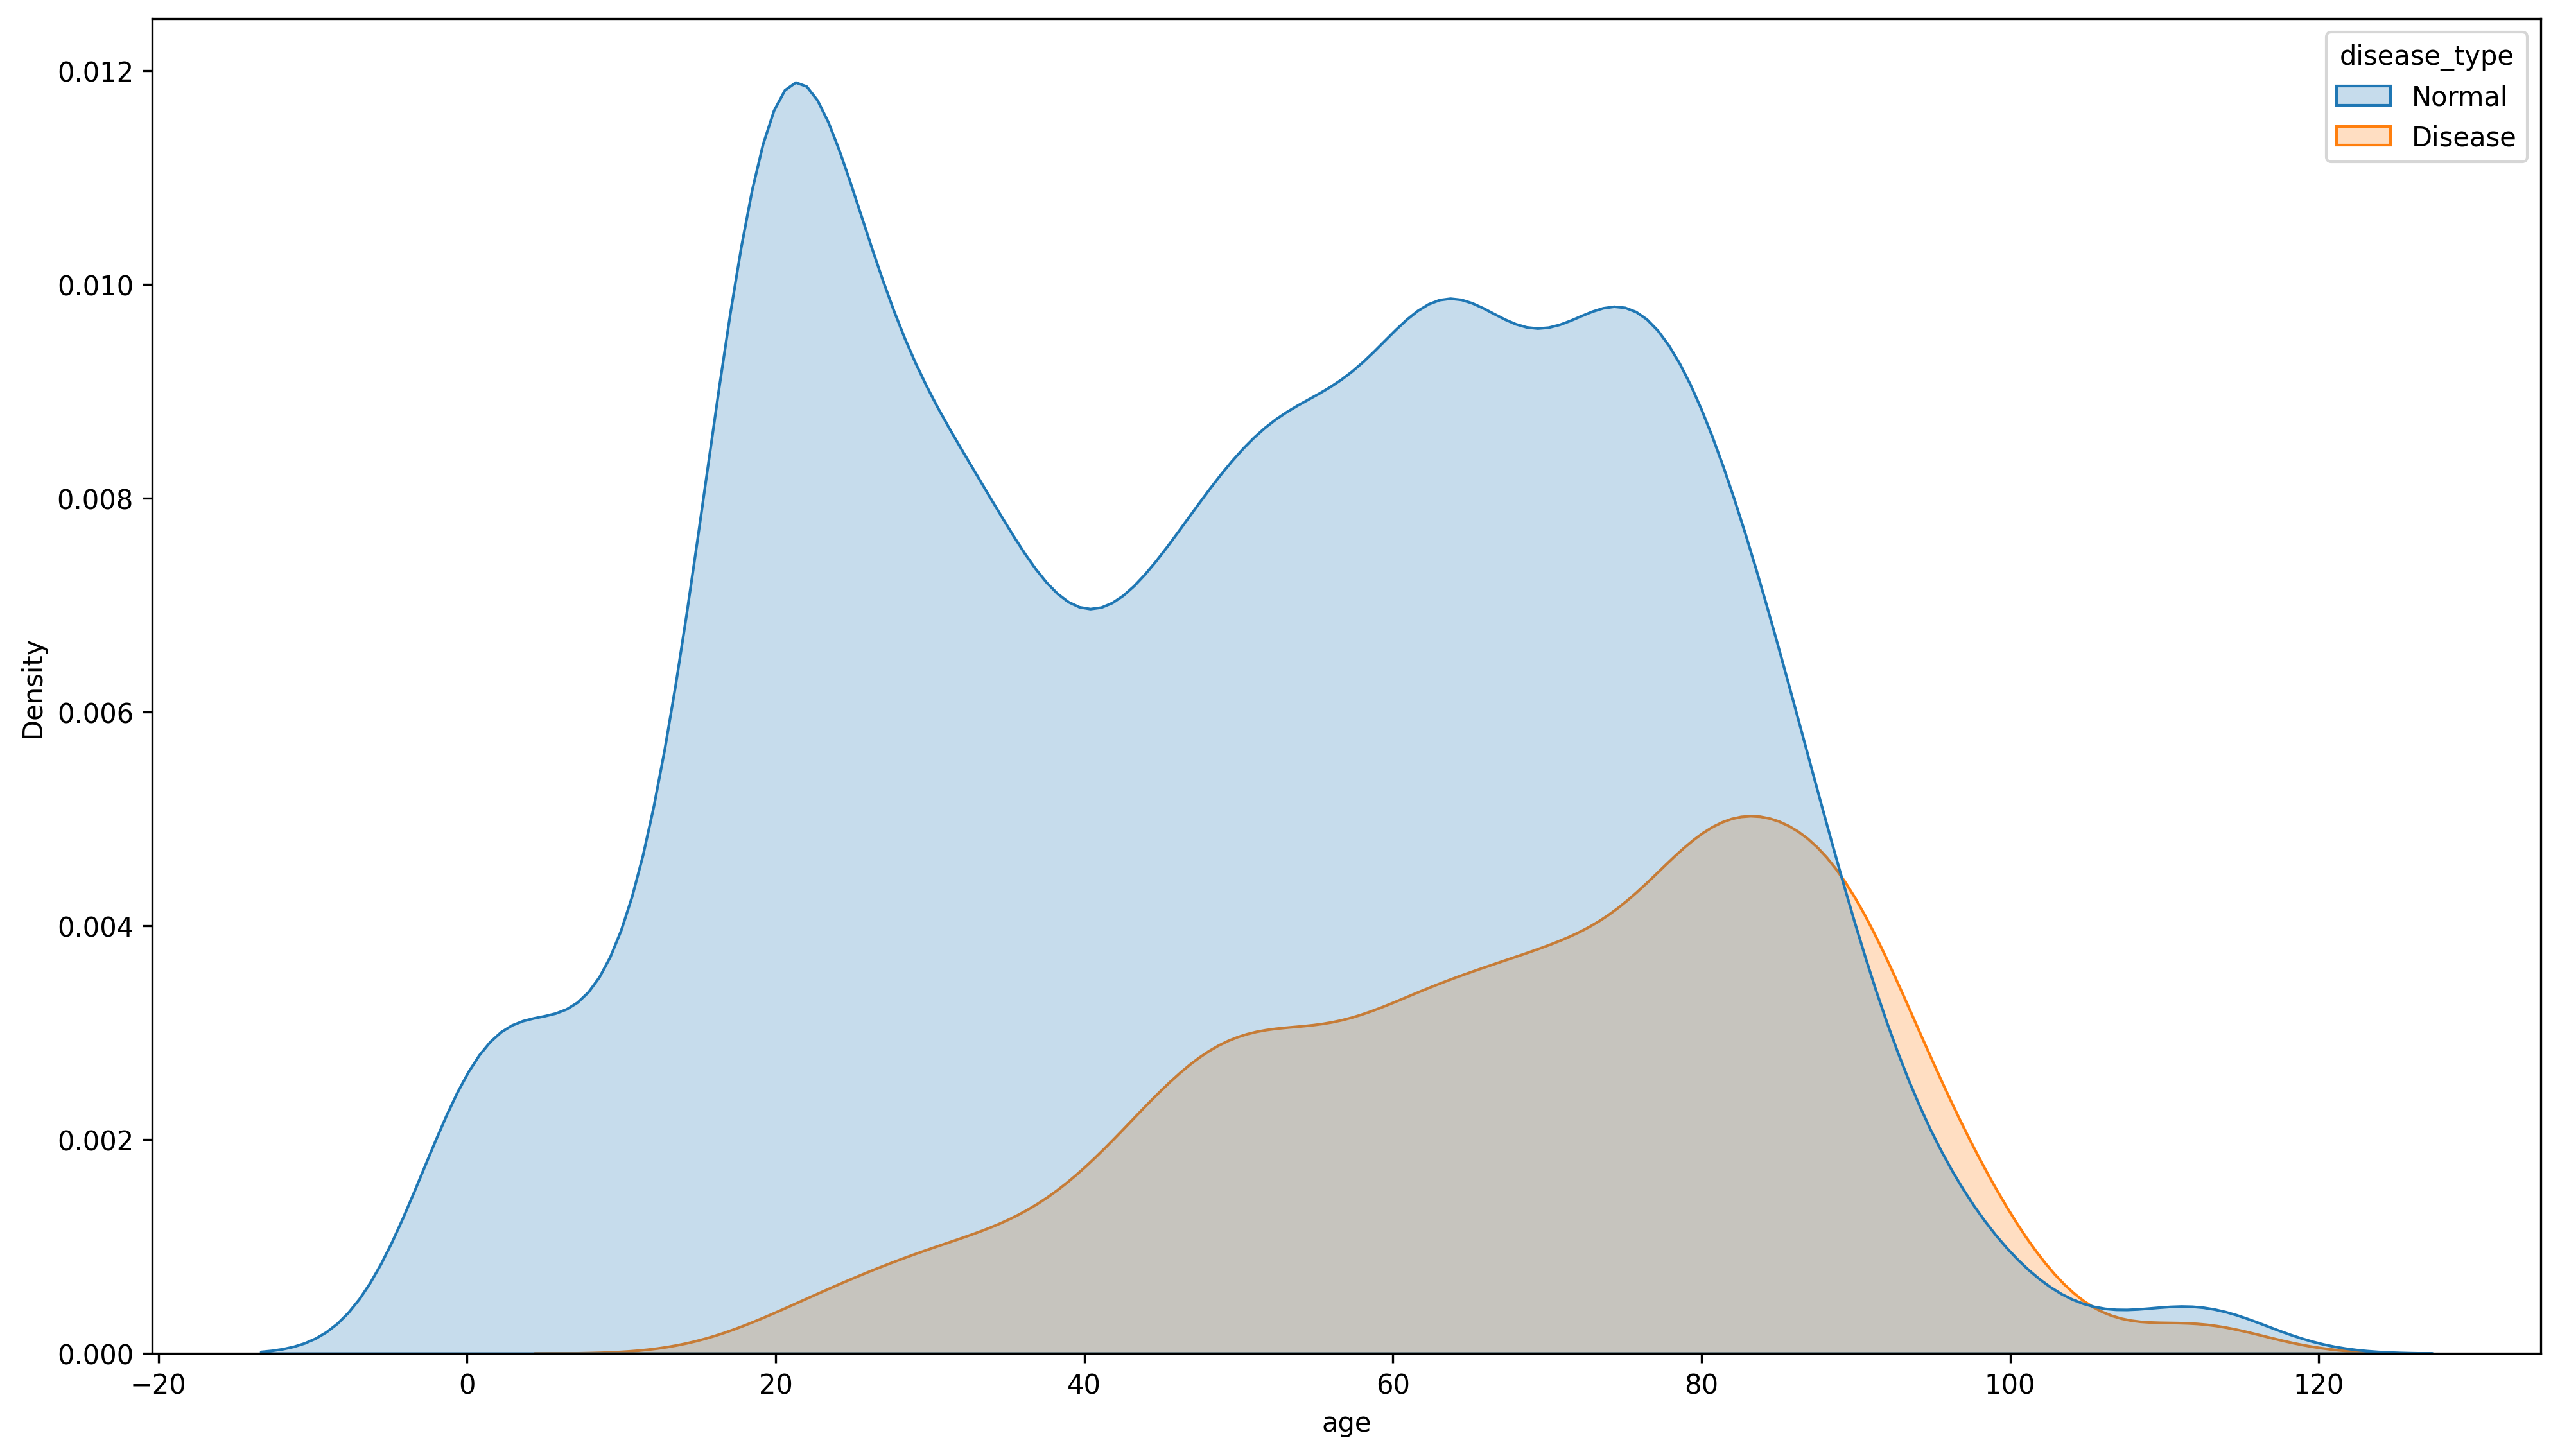

In [21]:
#绘制密度估计图
ND_kdeplot=plt.figure(figsize=(16,9),dpi=300)
sns.kdeplot(Normal_Disaese.iloc[:-1,:],x='age',hue='disease_type',shade=True)
plt.show()

In [22]:
#异常数据处理
cg_median=Age_feature_data.iloc[:,:-2].median()
# 定义一个函数来替换异常值  
data_condition=[Age_feature_data['cg23995914']<-4,Age_feature_data['cg11176990']<-5,Age_feature_data['cg11176990']>-1,
           Age_feature_data['cg25090514']<-4.5,Age_feature_data['cg25090514']>0,Age_feature_data['cg07553761']<-5,Age_feature_data['cg07553761']>1,
          Age_feature_data['cg10501210']<-7.5,Age_feature_data['cg10501210']>5,Age_feature_data['cg08453194']>1,Age_feature_data['cg18667659']<-1,
          Age_feature_data['cg18667659']>3,Age_feature_data['cg24079702']<-6,Age_feature_data['cg24079702']>2,
          Age_feature_data['cg23606718']<-4,Age_feature_data['cg23606718']>0,Age_feature_data['cg02650266']<-5,
          Age_feature_data['cg02650266']>2,Age_feature_data['cg16290275']<-5,Age_feature_data['cg07202479']<-2,
           Age_feature_data['cg07202479']>1.5,Age_feature_data['cg22454769']<-5,Age_feature_data['cg22454769']>7.5,
              Age_feature_data['cg10630880']<-4,Age_feature_data['cg10630880']>0]
cg_condition=['cg23995914','cg11176990','cg11176990','cg25090514','cg25090514','cg07553761','cg07553761','cg10501210','cg10501210',
             'cg08453194','cg18667659','cg18667659','cg24079702','cg24079702','cg23606718','cg23606718','cg02650266','cg02650266',
             'cg16290275','cg07202479','cg07202479','cg22454769','cg22454769','cg10630880','cg10630880']
for condition,cg in zip(data_condition,cg_condition):
    condition_data=Age_feature_data.loc[condition,cg]    #选择数据
    Age_feature_data[cg].replace(list(condition_data),cg_median[cg],inplace=True)    #替换数据

In [23]:
#进行数据归一化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Stand_data=Age_feature_data.loc[:,age_features]
Stand=StandardScaler()    #标准化归一化
Var_Age=Stand.fit(Stand_data)
Stand=Var_Age.transform(Stand_data)
MaxMin=MinMaxScaler(feature_range=(-1, 1))    #最大值-最小值归一化
MaxMin_stand=MaxMin.fit_transform(Stand)
Stand_data=DataFrame(MaxMin_stand)
Stand_data.columns=age_features
Stand_data['gender_encode']=Age_feature_data.loc[:,'gender_encode']
Stand_data['age']=Age_feature_data.loc[:,'age']

In [24]:
#查看预处理后的数据统计学特征
Stand_data.describe()

cg23995914   cg11176990   cg25090514   cg07553761   cg10501210  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean      0.105732    -0.120063    -0.150284     0.201637     0.160876   
std       0.286249     0.296831     0.327972     0.215637     0.308969   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.077629    -0.332266    -0.391986     0.084906     0.032588   
50%       0.123176    -0.122141    -0.217150     0.232732     0.032588   
75%       0.323445     0.083760     0.125305     0.344068     0.437841   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        cg08453194   cg18667659   cg24079702   cg23606718   cg02650266  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean      0.186681    -0.312346     0.260264     0.042618     0.024554   
std       0.282017     0.212080     0.234579     0.329371     0.256832   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.022429    -0.450547     0.156159    -0.195919    -0.123135   
50%       0.263398    -0.327902     0.288848     0.099505     0.010367   
75%       0.401206    -0.195159     0.415350     0.280547     0.151769   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        cg16867657   cg16290275   cg07202479   cg22454769   cg10630880  \
count  8233.000000  8233.000000  8233.000000  8233.000000  8233.000000   
mean      0.074720     0.274053     0.312192     0.145728    -0.130274   
std       0.171581     0.286476     0.255765     0.232728     0.293348   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -0.006383     0.023494     0.243753     0.032775    -0.342727   
50%       0.071359     0.353085     0.337695     0.151551    -0.111096   
75%       0.189729     0.484881     0.439571     0.305771     0.091241   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       gender_encode          age  
count    8164.000000  8233.000000  
mean        0.459946    53.659753  
std         0.498424    25.824928  
min         0.000000     0.000000  
25%         0.000000    31.400000  
50%         0.000000    56.000000  
75%         1.000000    75.000000  
max         1.000000   114.000000

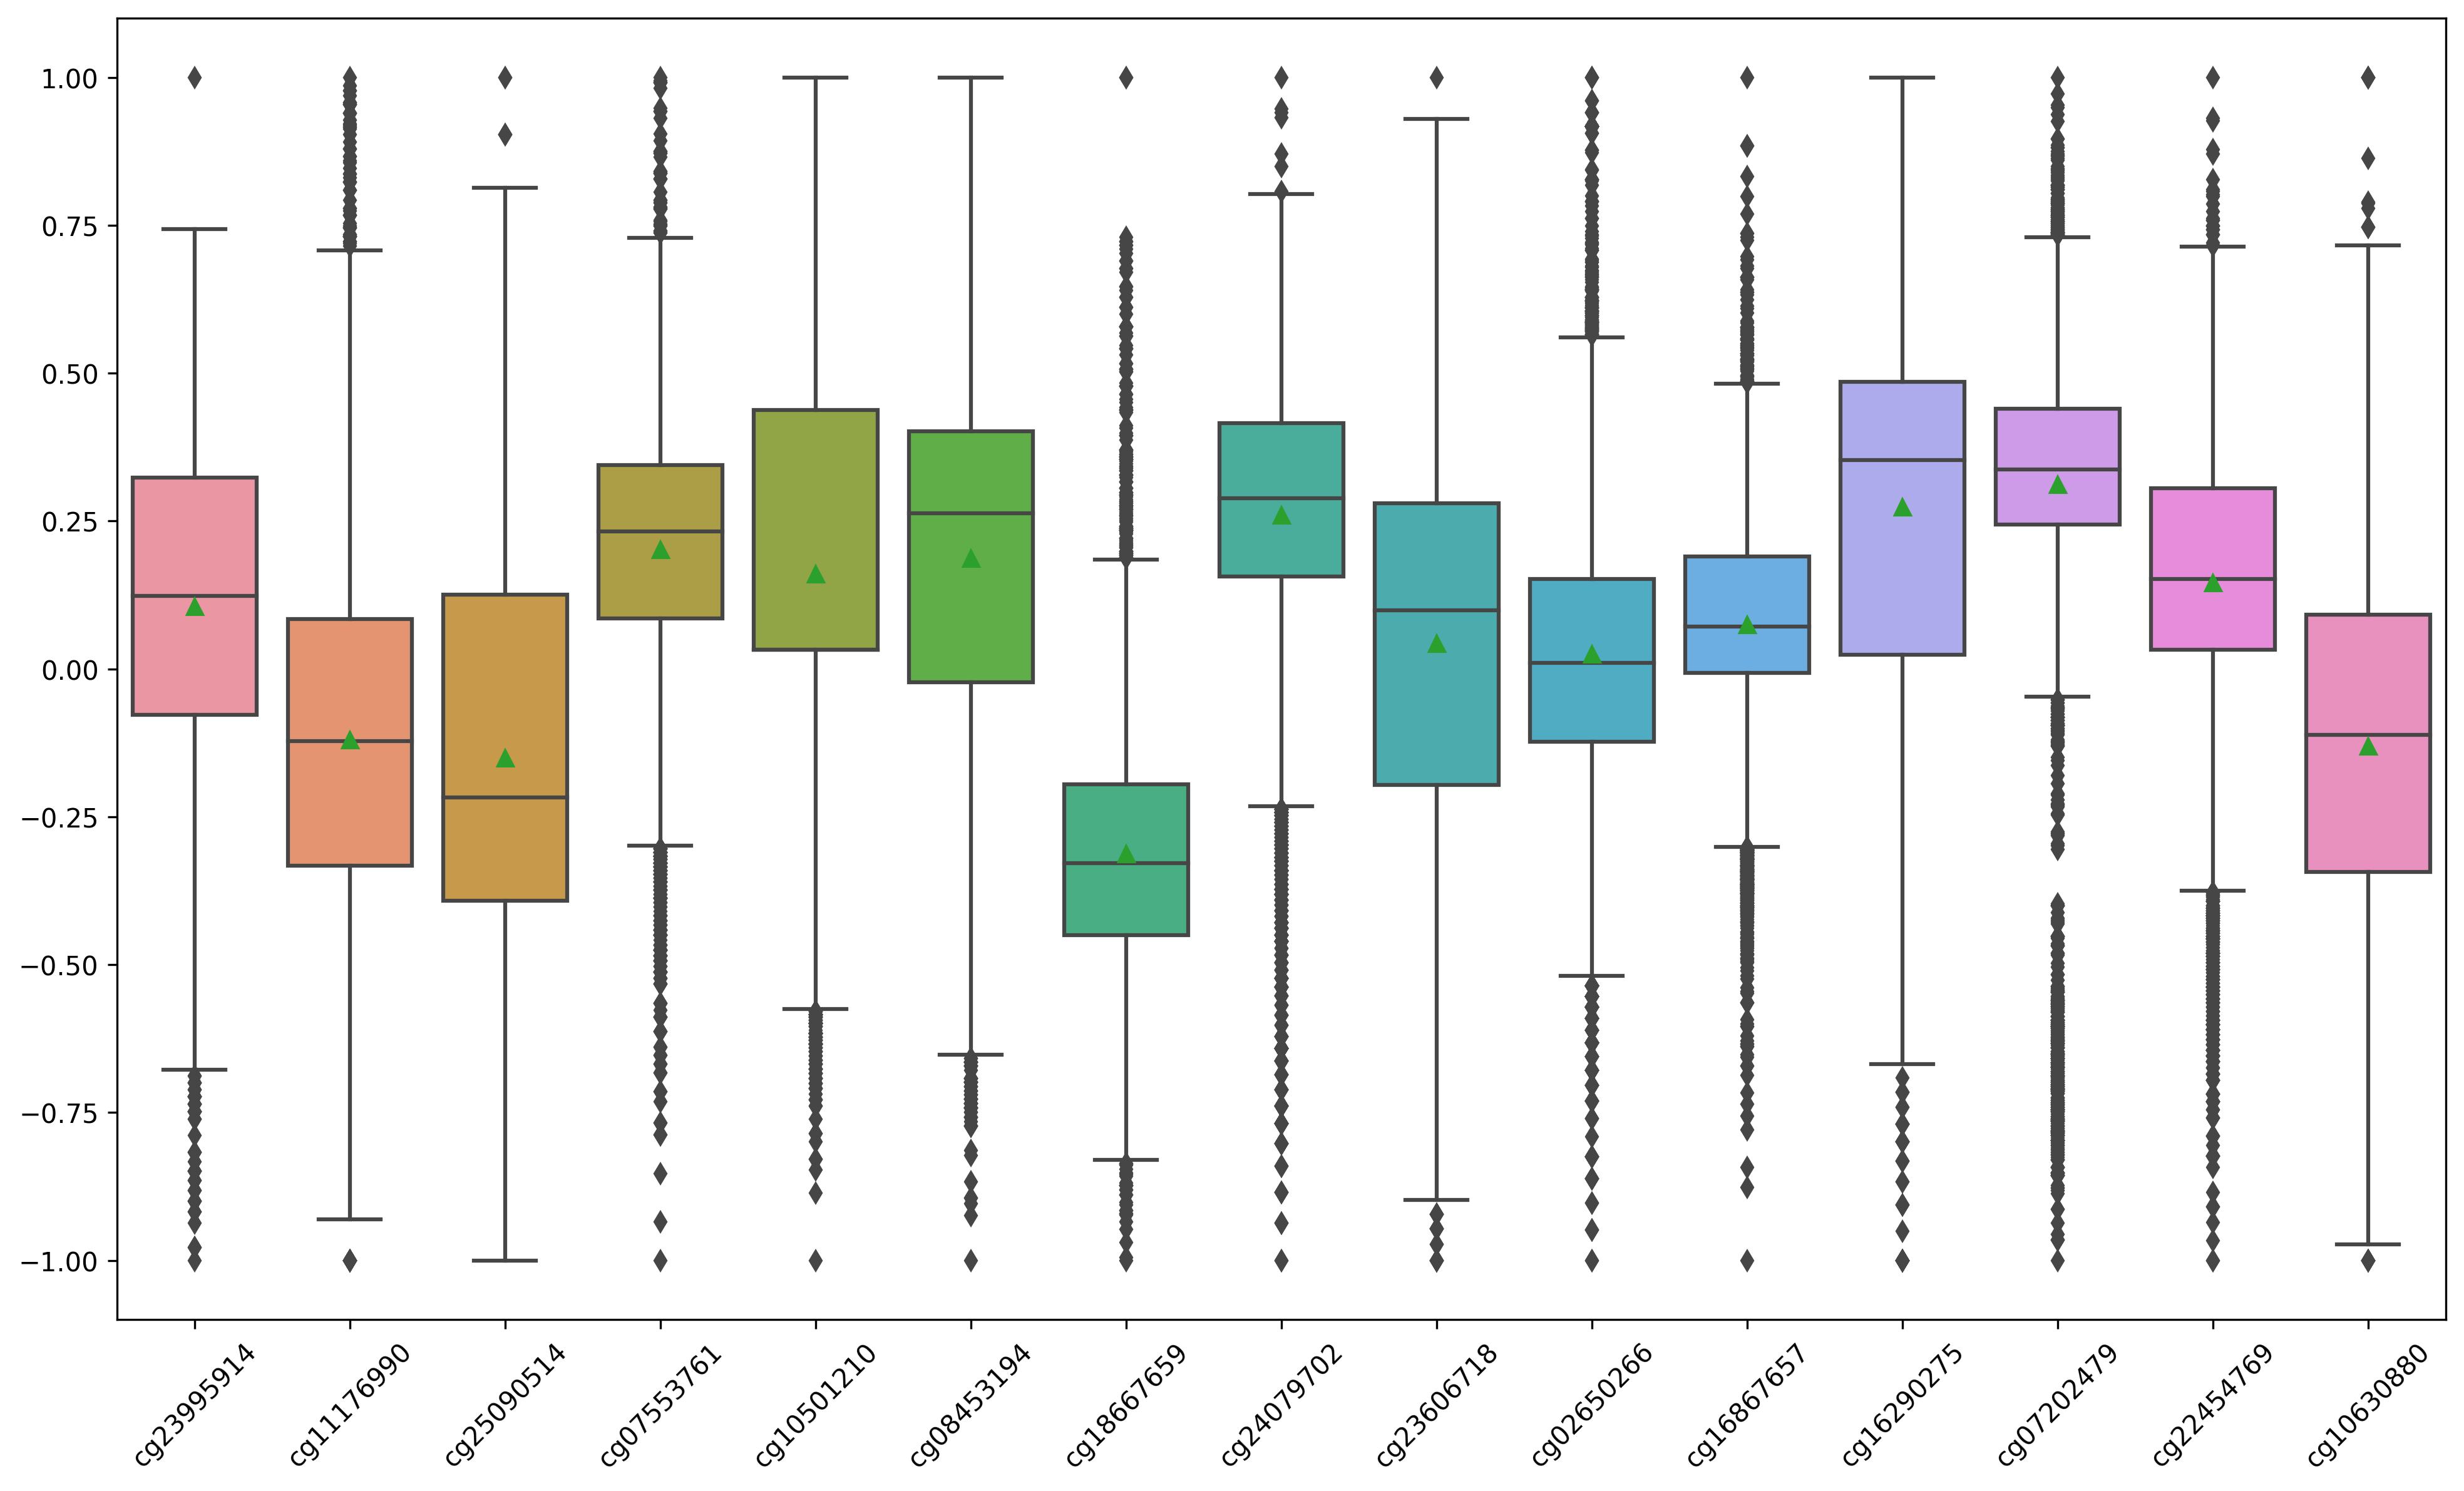

In [25]:
#绘制预处理后的数据箱型图
#绘制箱型图
boxplot=plt.figure(figsize=(16,9),dpi=300)
sns.boxplot(Stand_data.iloc[:,:-2],showmeans=True)
plt.xticks(rotation=45)
plt.show()

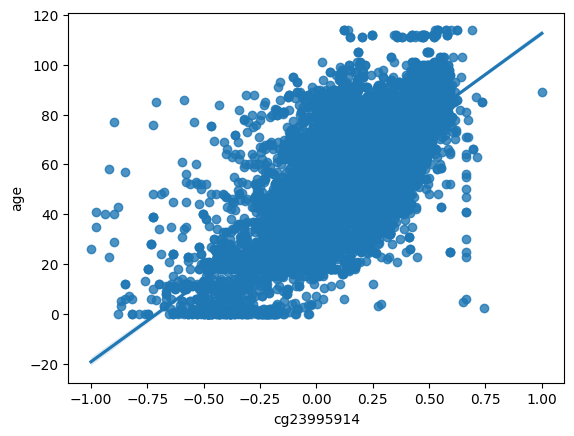

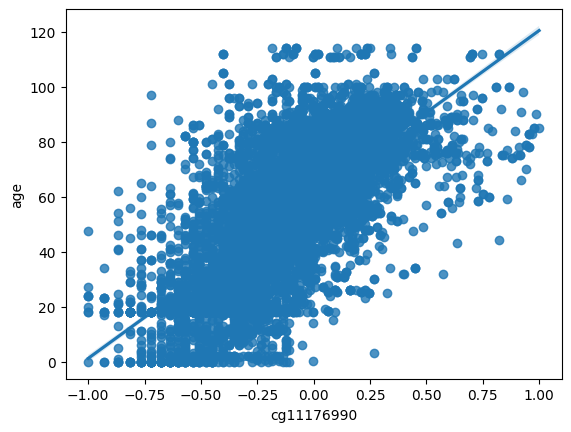

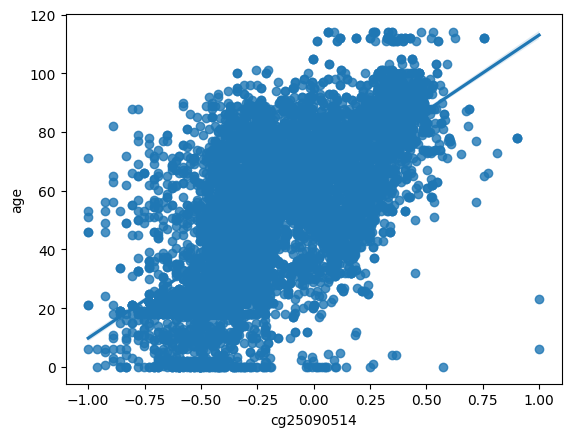

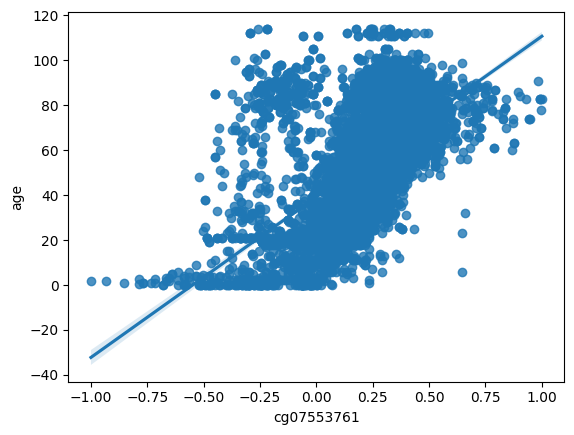

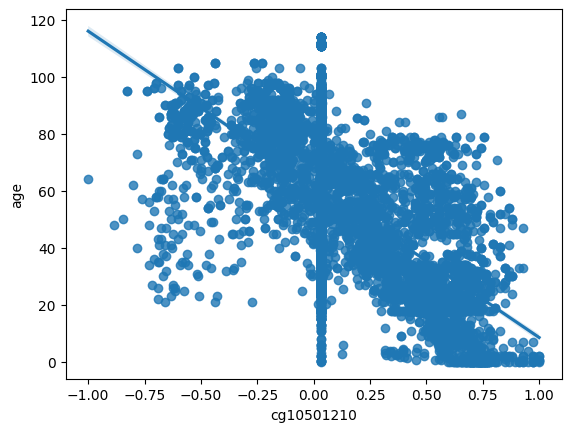

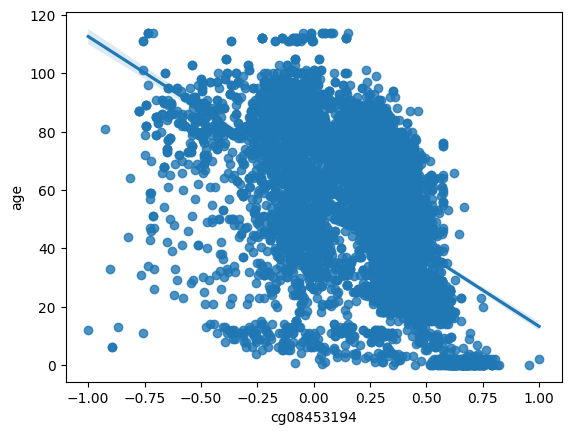

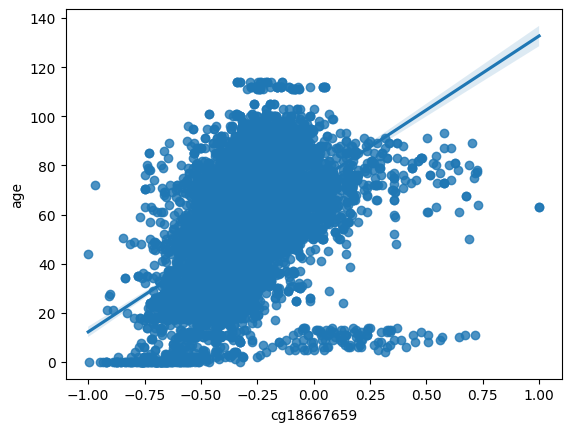

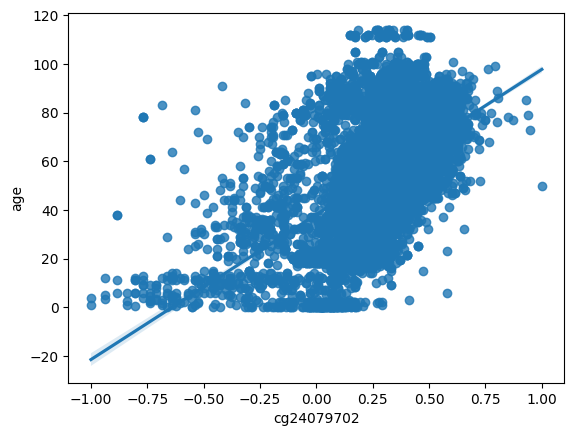

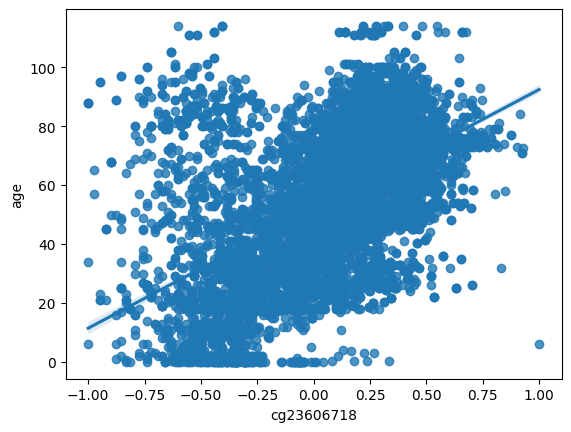

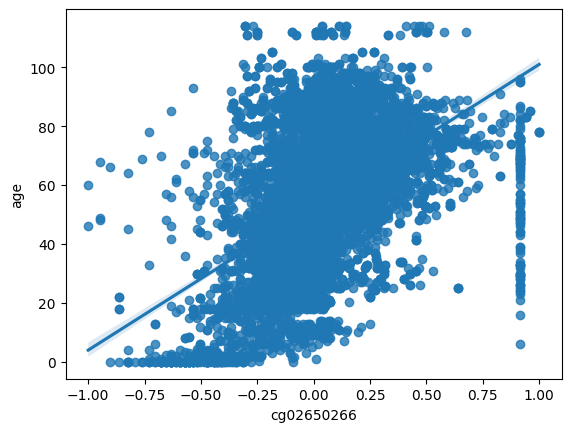

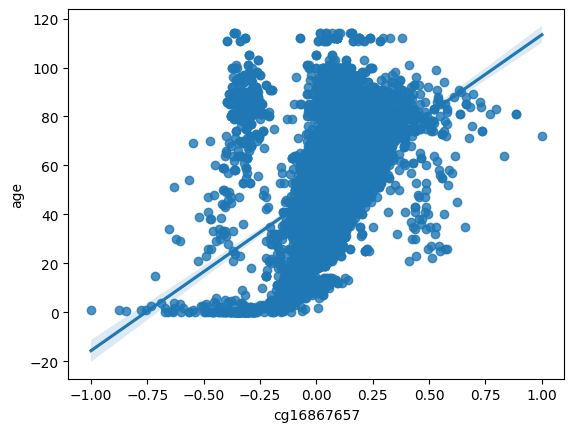

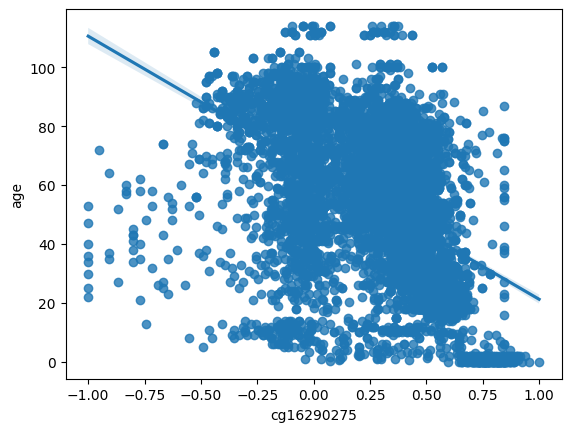

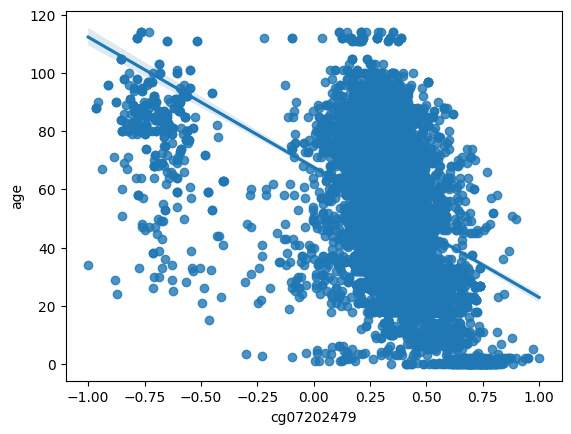

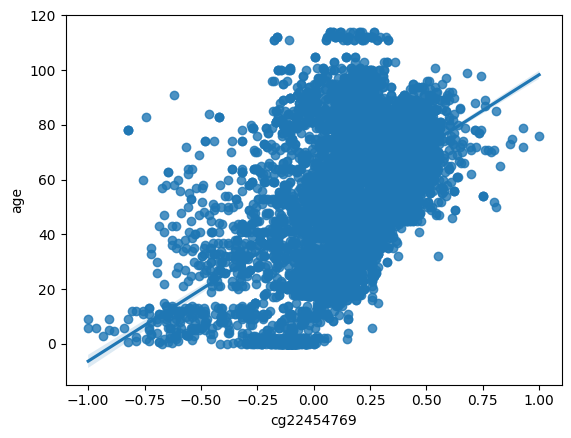

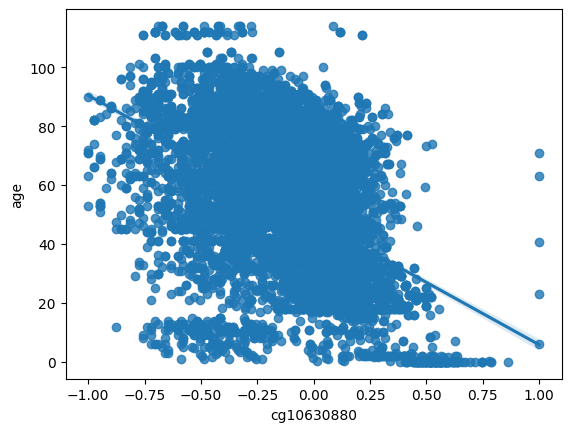

In [26]:
for age_label in age_features:
    fig=plt.figure()
    scatter=fig.add_subplot()
    sns.regplot(x=age_label,y='age',data=Stand_data)
    plt.show()

In [27]:
#构建特征子集数据
AgeDl_data=Stand_data.loc[:,age_features]
AgeDl_label=Stand_data['age']
from sklearn.model_selection import train_test_split
Age_feature_train,Age_feature_test,Age_target_train,Age_target_test=train_test_split(AgeDl_data,AgeDl_label,train_size=0.8,random_state=123)    #X表示数据输入特征，y表示数据标签，即生物学年龄
print('训练集数据规模为:{0},测试集数据规模为:{1}'.format(Age_feature_train.shape,Age_feature_test.shape))
print('训练集标签规模为:{0},,测试集标签规模为:{1}'.format(Age_target_train.shape,Age_target_test.shape))

训练集数据规模为:(6586, 15),测试集数据规模为:(1647, 15)
训练集标签规模为:(6586,),,测试集标签规模为:(1647,)


尝试机器学习模型：XGBoost,CatBoost和LightBM模型

In [28]:
#载入并训练XGBoost模型
from xgboost import XGBRegressor
Model_XGB=XGBRegressor(booster='gbtree',n_estimators=2000,max_depth=5,objective='reg:squarederror',gpu_id=0, tree_method='gpu_hist')
Model_XGB.fit(Age_feature_train,Age_target_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, ...)

In [31]:
#使用10折交叉验证评估模型
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
def Model_Evelate_CV(Model,Data,Target):
    cv=KFold(n_splits=10, shuffle=True, random_state=2024)
    kv_scores =cross_validate(Model,Data,Target,cv=cv,scoring='neg_mean_absolute_error',
                          return_train_score=True)
    print('Fit_time:',kv_scores['fit_time'])
    print('Mean Fit_time:',kv_scores['fit_time'].mean())
    print('score_time:',kv_scores['score_time'])
    print('Mean score_time:',kv_scores['score_time'].mean())
    print('train_score:',-kv_scores['train_score'])
    print('Mean train_score:',-kv_scores['train_score'].mean())
    print('test_score:',-kv_scores['test_score'])
    print('Mean test_score:',-kv_scores['test_score'].mean())

In [32]:
Model_Evelate_CV(Model=Model_XGB,Data=Age_feature_train,Target=Age_target_train)

Fit_time: [2.98845863 3.00578332 2.99283123 2.99886417 3.01335168 3.07901168
 2.93566585 2.99728179 2.97019434 3.01100111]
Mean Fit_time: 2.9992443799972532
score_time: [0.0474422  0.02788711 0.0274725  0.02739525 0.02730799 0.02736568
 0.02646327 0.03582072 0.02741241 0.02814484]
Mean score_time: 0.030271196365356447
train_score: [0.01449783 0.02126285 0.01812293 0.02154877 0.01165433 0.02037007
 0.0186443  0.02189044 0.02094484 0.02101197]
Mean train_score: 0.018994833417534333
test_score: [3.93952171 3.66835009 3.7021459  3.97377104 4.08358431 3.89157811
 3.35948118 3.8150995  3.78023968 3.81411972]
Mean test_score: 3.8027891244186245


In [35]:
#模型评估
from sklearn.metrics import mean_squared_error,mean_absolute_error
def Model_Evelation(model,X_train,y_train,X_test,y_test):
    #Train_Error=1-model.score(X_train,y_train)    #训练误差
    #Test_Error=1-model.score(X_test,y_test)    #测试误差
    #print('模型训练误差为:{0},测试误差为:{1}'.format(Train_Error,Test_Error))
    Train_mae=mean_absolute_error(y_train,model.predict(X_train))    #训练MAE
    Test_mae=mean_absolute_error(y_test,model.predict(X_test))    #测试MAE
    print('模型训练MAE为:{0},测试MAE为:{1}'.format(Train_mae,Test_mae))
    Train_mse=mean_squared_error(y_train,model.predict(X_train))    #训练MSE
    Test_mse=mean_squared_error(y_test,model.predict(X_test))    #测试MSE
    print('模型训练MSE为:{0},测试MSE为:{1}'.format(Train_mse,Test_mse))
Model_Evelation(model=Model_XGB,X_train=Age_feature_train,y_train=Age_target_train,X_test=Age_feature_test,y_test=Age_target_test)

模型训练MAE为:0.020046334606199614,测试MAE为:3.6412517553862136
模型训练MSE为:0.1820097286151801,测试MSE为:41.46162348580493


使用网格搜索查看搜索最佳超参数

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv=KFold(n_splits=10, shuffle=True, random_state=2024)
param_grid = {  
    'n_estimators': [1000,2000,3000],  
    'max_depth' : [6,7,8],
    'learning_rate':[0.05,0.01,0.005]
}
Grid_XGB=XGBRegressor(booster='gbtree',objective='reg:squarederror',gpu_id=0,n_jobs=-1,tree_method='gpu_hist')
grid_search=GridSearchCV(estimator=Grid_XGB, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_search.fit(Age_feature_train,Age_target_train)

In [72]:
best_model = grid_search.best_estimator_
best_params_= grid_search.best_params_

In [73]:
print(best_params_)

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 3000}


In [74]:
Model_Evelate_CV(Model=best_model,Data=Age_feature_train,Target=Age_target_train)

Fit_time: [7.80279946 7.72662926 7.76858377 7.77179956 7.81180668 7.8975637
 7.80884409 8.00302267 8.12816572 7.77775431]
Mean Fit_time: 7.849696922302246
score_time: [0.05325818 0.0530467  0.05153847 0.05190229 0.05201149 0.05300975
 0.05287313 0.05373549 0.05330825 0.05307078]
Mean score_time: 0.052775454521179196
train_score: [0.72353457 0.78684942 0.77454684 0.80006093 0.76965437 0.7753044
 0.81839654 0.73073115 0.72490329 0.78553407]
Mean train_score: 0.7689515591444287
test_score: [3.81837907 3.73494908 3.52631353 3.75979562 3.89559622 3.55649328
 3.34784306 3.74175328 3.76927823 3.80273715]
Mean test_score: 3.695313852022079


In [75]:
Model_Evelation(model=best_model,X_train=Age_feature_train,y_train=Age_target_train,X_test=Age_feature_test,y_test=Age_target_test)

模型训练MAE为:0.8647438390683828,测试MAE为:3.608943107644373
模型训练MSE为:1.8000668359385181,测试MSE为:36.95180193066489


In [47]:
#分别训练lightgbm模型
from lightgbm import LGBMRegressor
Model_LGB=LGBMRegressor(boosting_type='gbdt',
                objective='regression',
                metric='mae',
                min_child_weight=6,
                num_leaves=2 ** 6,
                lambda_l2=10,
                feature_fraction=0.9,
                bagging_fraction=0.9,
                bagging_freq=15,
                learning_rate=0.1,
                seed=2023,
                nthread=16,
                verbose=-1)
Model_LGB.fit(Age_feature_train,Age_target_train)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=15, feature_fraction=0.9,
              lambda_l2=10, metric='mae', min_child_weight=6, nthread=16,
              num_leaves=64, objective='regression', seed=2023, verbose=-1)

In [48]:
Model_Evelate_CV(Model=Model_LGB,Data=Age_feature_train,Target=Age_target_train)

Fit_time: [0.27956414 0.27848101 0.27935147 0.28020287 0.27672076 0.27299356
 0.27685618 0.28324509 0.28178549 0.2769537 ]
Mean Fit_time: 0.2786154270172119
score_time: [0.00645685 0.0065341  0.00640297 0.00632715 0.00595927 0.00644064
 0.00661635 0.00650835 0.00658369 0.00640607]
Mean score_time: 0.006423544883728027
train_score: [2.44150757 2.4703212  2.49343388 2.4806006  2.46341832 2.468359
 2.53074951 2.50959007 2.48911873 2.48479955]
Mean train_score: 2.483189842432914
test_score: [4.51899332 4.3531438  4.23886469 4.10488577 4.40980026 4.20259846
 3.80932851 4.18703355 4.39932322 4.40605091]
Mean test_score: 4.263002248610671


In [49]:
Model_Evelation(model=Model_LGB,X_train=Age_feature_train,y_train=Age_target_train,X_test=Age_feature_test,y_test=Age_target_test)

模型训练MAE为:2.5440198508133727,测试MAE为:4.155990709811343
模型训练MSE为:13.392284930071591,测试MSE为:38.783433748688914


In [52]:
#训练catBoost模型
from catboost import CatBoostRegressor
Model_Cat=CatBoostRegressor(learning_rate=0.5, depth=5, bootstrap_type='Bernoulli',
                            random_seed=2023,od_type='Iter', od_wait=100,verbose=0)
Model_Cat.fit(Age_feature_train,Age_target_train)

In [53]:
Model_Evelate_CV(Model=Model_Cat,Data=Age_feature_train,Target=Age_target_train)

Fit_time: [2.44044113 2.17263842 2.21356869 2.12720585 2.1203115  2.18017387
 2.16083384 2.0922575  2.07967615 2.11607456]
Mean Fit_time: 2.1703181505203246
score_time: [0.00368571 0.00362015 0.0037775  0.00380731 0.00388932 0.00391698
 0.00327897 0.00372243 0.00376272 0.00350094]
Mean score_time: 0.0036962032318115234
train_score: [0.78368697 0.81879598 0.83350769 0.80102355 0.79786218 0.86775613
 0.83380515 0.84514465 0.82344384 0.84861065]
Mean train_score: 0.8253636795506593
test_score: [4.51561341 4.13227658 3.92869634 4.20878695 4.1929614  4.26898457
 3.68317461 4.23654573 4.15283176 4.15720045]
Mean test_score: 4.147707179364051


In [55]:
Model_Evelation(model=Model_Cat,X_train=Age_feature_train,y_train=Age_target_train,X_test=Age_feature_test,y_test=Age_target_test)

模型训练MAE为:0.8923267185246634,测试MAE为:4.110400596518298
模型训练MSE为:1.701259466736189,测试MSE为:47.05166086670004


载入SHAP库计算SHAP值

In [76]:
import shap
Explainer=shap.TreeExplainer(best_model)    #创建训练集解释器
shap_values=Explainer.shap_values(Age_feature_train)    #计算训练shap值

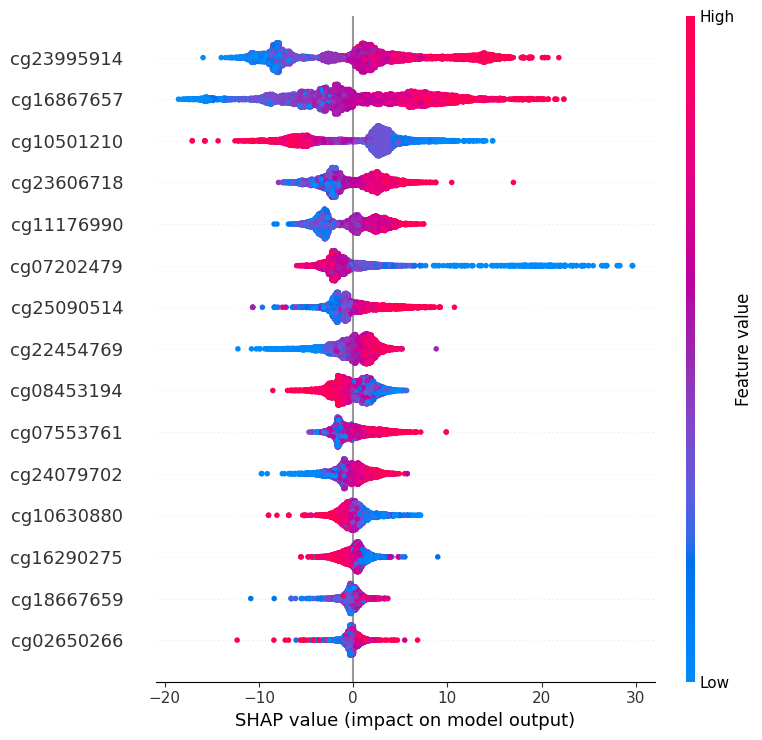

In [77]:
shap.summary_plot(shap_values,Age_feature_train)    #全局特征SHAP分布(训练)

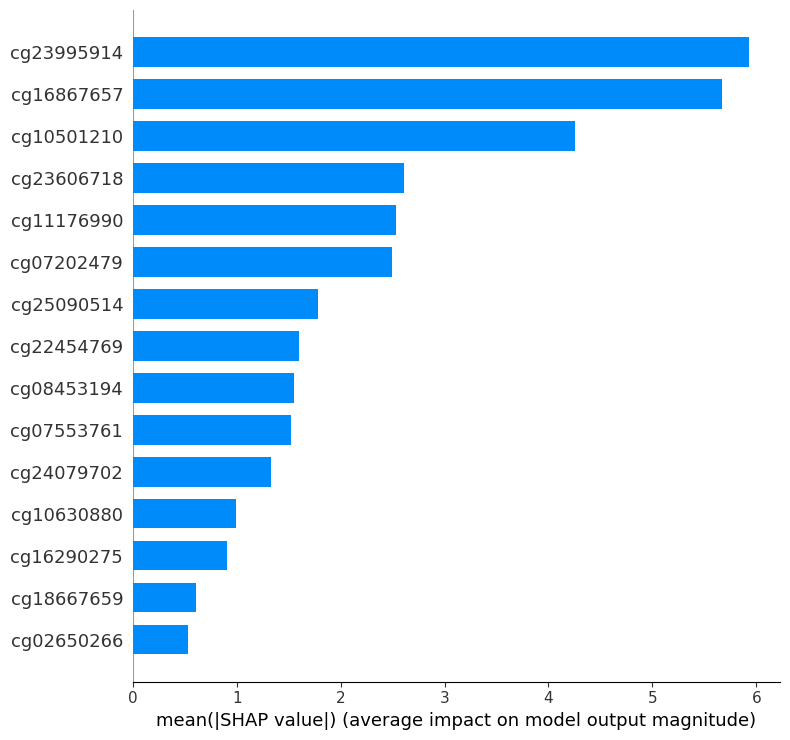

In [78]:
shap.summary_plot(shap_values,Age_feature_train,plot_type='bar')    #特征重要性堆叠图(训练)

In [79]:
Explainer_test=shap.TreeExplainer(best_model)    #创建测试集解释器
shap_values_test=Explainer_test.shap_values(Age_feature_test)    #计算测试shap值

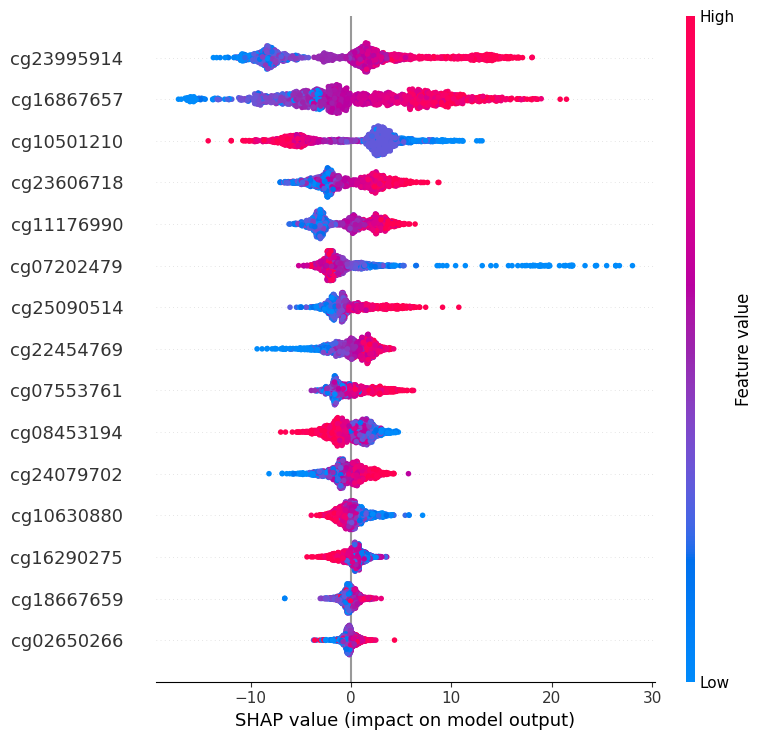

In [80]:
shap.summary_plot(shap_values_test,Age_feature_test)    #全局特征SHAP分布(测试)

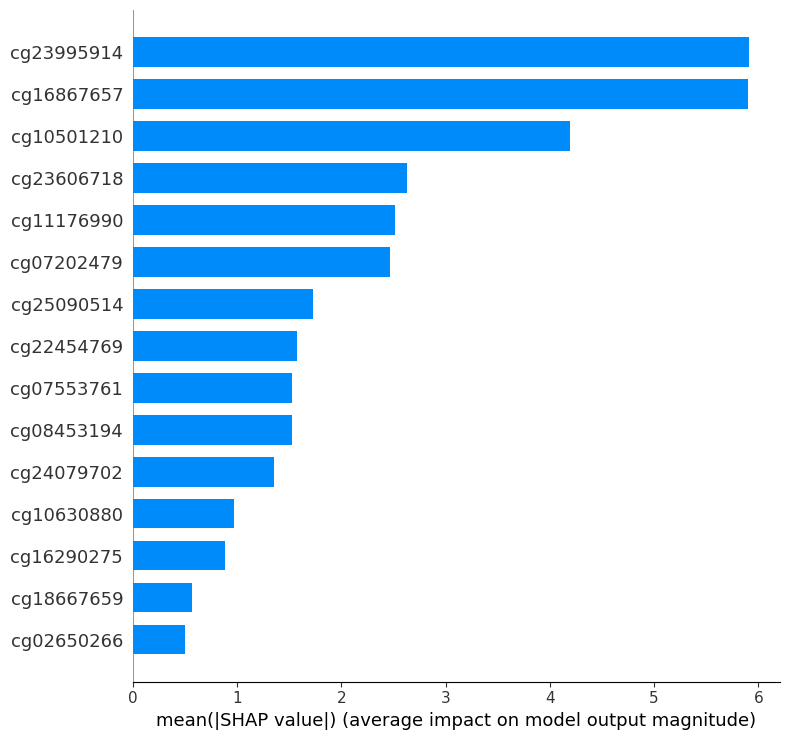

In [81]:
shap.summary_plot(shap_values_test,Age_feature_test,plot_type='bar')    #特征重要性堆叠图(测试)

In [82]:
#保存模型
import joblib
Model_list=[Model_XGB,Model_LGB,Model_Cat]
Model_name=['XGBoost_Age.pkl','LightGBM_Age.pkl','Model_CatBoost.pkl']
try:
    for model,name in zip(Model_list,Model_name):
        joblib.dump(model,name)
    print('模型保存成功!')
except:
    print('模型保存失败')

模型保存成功!


In [83]:
joblib.dump(best_model,'best_model.pkl')

['best_model.pkl']

模型:XGBoost_PredictR2值为:0.9973061624108074


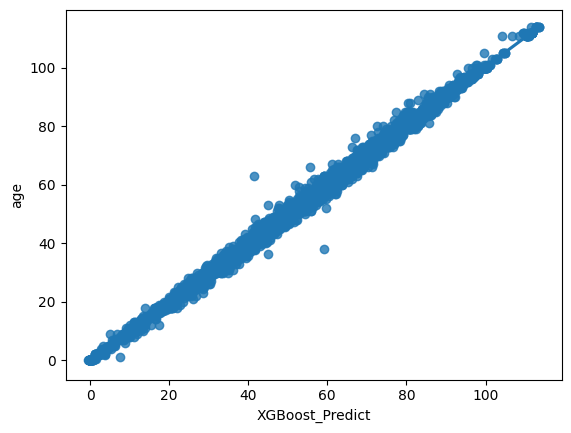

模型:LightGBM_PredictR2值为:0.9799581660916522


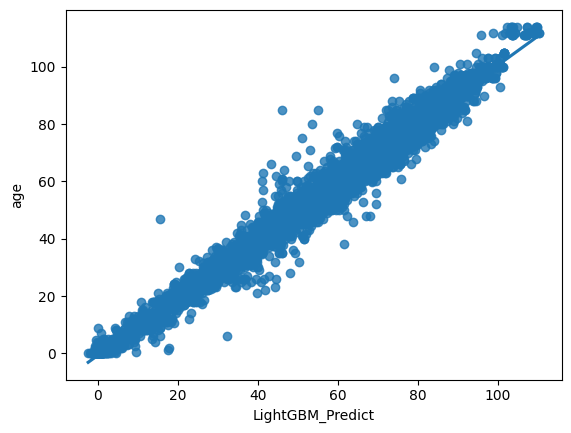

模型:CatBoost_PredictR2值为:0.9974540297010281


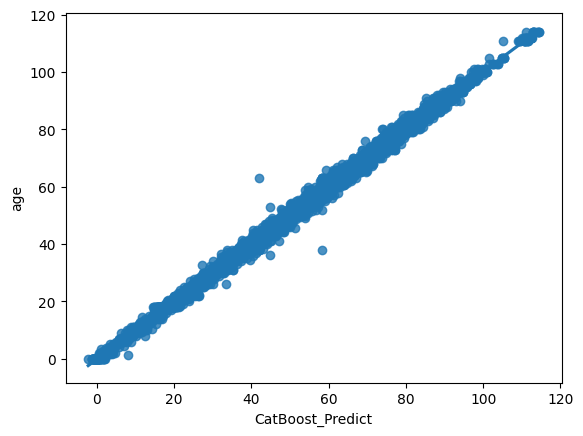

In [84]:
#模型结果预测-训练集
from sklearn.metrics import r2_score
True_Predict_Data=DataFrame(Age_target_train)    #载入真实生物学数据
True_Predict_Data['XGBoost_Predict']=best_model.predict(Age_feature_train)    #载入XGBoost预测数据
True_Predict_Data['LightGBM_Predict']=Model_LGB.predict(Age_feature_train)    #载入LightGBM预测数据
True_Predict_Data['CatBoost_Predict']=Model_Cat.predict(Age_feature_train)    #载入CatBoost预测数据
#True_Predict_Data['DNN_Predict']=Age_NN.predict(Age_feature_train)    #载入DNN预测数据
PredictData_Model=['XGBoost_Predict','LightGBM_Predict','CatBoost_Predict']
for Xdata_Str in PredictData_Model:    #绘制训练数据回归图
    R2_score=r2_score(True_Predict_Data.loc[:,'age'],True_Predict_Data.loc[:,Xdata_Str])
    print('模型:{0}R2值为:{1}'.format(Xdata_Str,R2_score))
    fig_r2=plt.figure()
    ax_r2=fig_r2.add_subplot()
    sns.regplot(x=Xdata_Str,y='age',data=True_Predict_Data)
    plt.show()

模型:XGBoost_Predict残差为:0.0005165432741482269


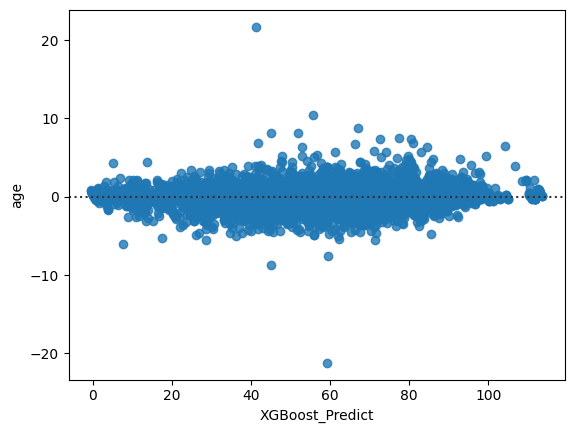

模型:LightGBM_Predict残差为:0.005368099925710313


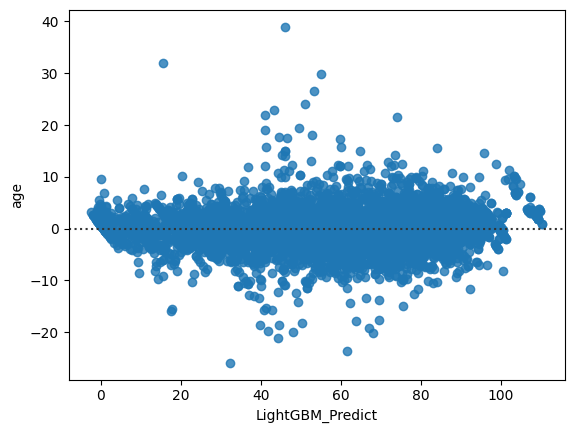

模型:CatBoost_Predict残差为:-0.0001350786013303109


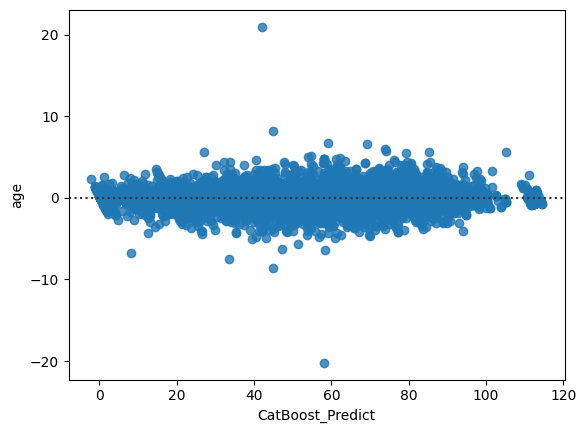

In [85]:
#绘制训练数据集残差图
import numpy as np
for Xdata_Str in PredictData_Model: 
    Resid_score=np.mean(True_Predict_Data.loc[:,'age']-True_Predict_Data.loc[:,Xdata_Str])
    print('模型:{0}残差为:{1}'.format(Xdata_Str,Resid_score))
    fig_resid=plt.figure()
    ax_resid=fig_resid.add_subplot()
    sns.residplot(x=Xdata_Str,y='age',data=True_Predict_Data)
    plt.show()

模型:XGBoost_PredictR2值为:0.9441254087892339


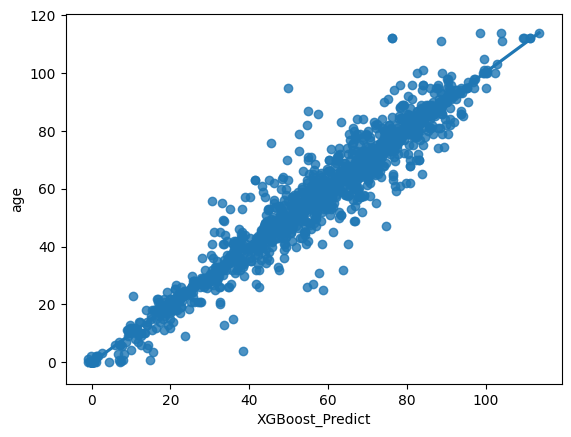

模型:LightGBM_PredictR2值为:0.9413558096429526


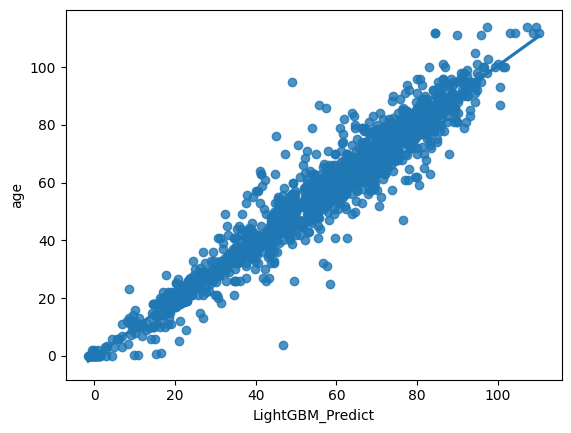

模型:CatBoost_PredictR2值为:0.9288534745437471


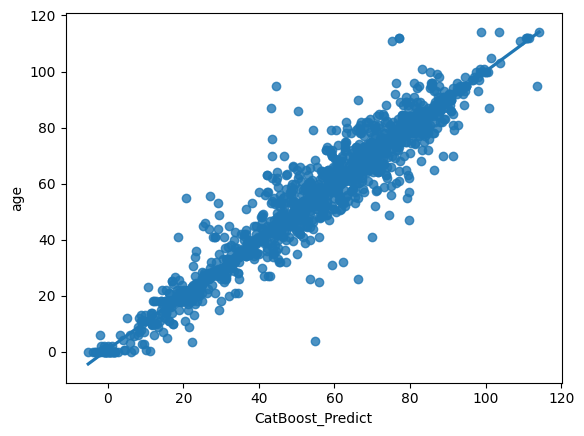

In [86]:
#模型结果预测-测试集
from sklearn.metrics import r2_score
True_Predict_Data_test=DataFrame(Age_target_test)    #载入真实生物学数据
True_Predict_Data_test['XGBoost_Predict']=best_model.predict(Age_feature_test)    #载入XGBoost预测数据
True_Predict_Data_test['LightGBM_Predict']=Model_LGB.predict(Age_feature_test)    #载入LightGBM预测数据
True_Predict_Data_test['CatBoost_Predict']=Model_Cat.predict(Age_feature_test)    #载入CatBoost预测数据
PredictData_Model_test=['XGBoost_Predict','LightGBM_Predict','CatBoost_Predict']
for Xdata_Str_test in PredictData_Model_test:    #绘制测试数据集回归图
    R2_score_test=r2_score(True_Predict_Data_test.loc[:,'age'],True_Predict_Data_test.loc[:,Xdata_Str_test])
    print('模型:{0}R2值为:{1}'.format(Xdata_Str_test,R2_score_test))
    fig_r2_test=plt.figure()
    ax_r2_test=fig_r2.add_subplot()
    sns.regplot(x=Xdata_Str_test,y='age',data=True_Predict_Data_test)
    plt.show()

模型:XGBoost_Predict残差为:0.09393097290972932


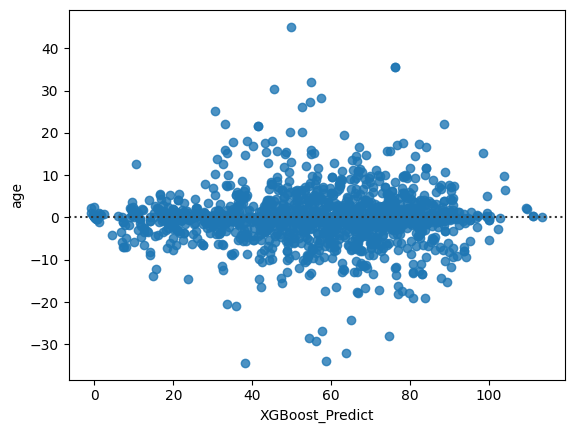

模型:LightGBM_Predict残差为:0.14446369199978445


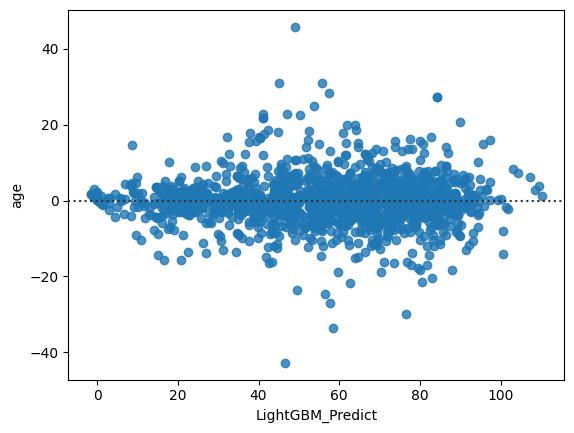

模型:CatBoost_Predict残差为:0.42651224051012754


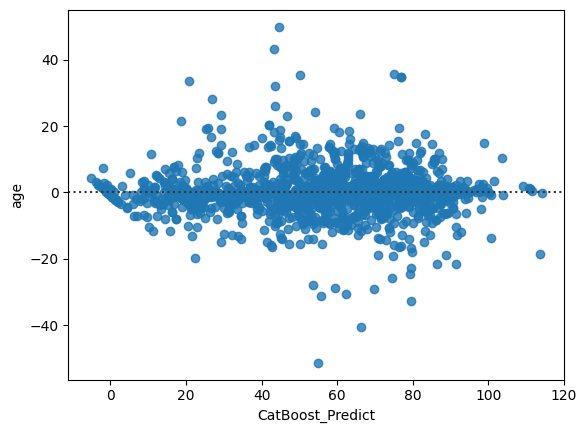

In [87]:
for Xdata_Str_test in PredictData_Model_test:    #绘制测试数据集残差图
    Resid_score_test=np.mean(True_Predict_Data_test.loc[:,'age']-True_Predict_Data_test.loc[:,Xdata_Str_test])
    print('模型:{0}残差为:{1}'.format(Xdata_Str_test,Resid_score_test))
    fig_resid_test=plt.figure()
    ax_resid_test=fig_resid_test.add_subplot()
    sns.residplot(x=Xdata_Str_test,y='age',data=True_Predict_Data_test)
    plt.show()